In [1]:
# 整理数据的库
import numpy as np
import pandas as pd
import pyreadstat #读取sav格式文件需要
# 数据可视化的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# 数据分析的库
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # 回归分析
from statsmodels.stats.anova import anova_lm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import chi2_contingency #卡方检验
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd #事后检验
# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告

In [3]:
import os

os.chdir(r"d:\work\worked\毕业论文\2024届毕业论文\#红学研究") # 设置工作目录

# 读取数据及初步处理

In [4]:
#dataframe的值为纯数字
df_1,meta_1 = pyreadstat.read_sav("./data/reader_the_story_of_stone.sav",encoding='utf-8') 

# dataframe的值为元信息
df_2,meta_2 = pyreadstat.read_sav("./data/reader_the_story_of_stone.sav",encoding='utf-8',apply_value_formats=True)
#注意：李克特计分方法的变量pyreadstat认定为类别型变量，这个和我们的需求是不同的

我们要做的是取df_1中的数值型变量出来，取df_2的类别型变量出来，合并成新的df

In [5]:
#取出类别型变量
category_vars = ["Q3_Choice1","Q3_Choice2","Q3_Choice3","Q3_Choice4","Q3_Choice5","Q3_Choice6","Q3_Choice7",
                 "Q5","Q6","Q7","Q8","Q9","Q10",
                 "Q11_Row1","Q11_Row2","Q11_Row3","Q11_Row4","Q11_Row5","Q11_Row6","Q11_Row7","Q11_Row8","Q11_Row9","Q11_Row10","Q11_Row11","Q11_Row12","Q11_Row13",
                 "Q14","Q15","Q16","Q17","Q18",
                 "Q5_score","Q6_score","Q7_score","Q8_score","Q9_score","Q10_score",
                 "full_text_reader","stone_fan"]

df_a = df_2.loc[:,category_vars] 

#取出数值型变量
numerical_vars = ["Q1","Q2","Q4",
                  "Q12_Row1","Q12_Row2","Q12_Row3","Q12_Row4","Q12_Row5","Q12_Row6","Q12_Row7","Q12_Row8","Q12_Row9","Q12_Row10",
                  "Q13_Row1","Q13_Row2","Q13_Row3","Q13_Row4","Q13_Row5","Q13_Row6","Q13_Row7","Q13_Row8","score",
                  "Q11_1_recode","Q11_2_recode","Q11_3_recode","Q11_4_recode","Q11_5_recode","Q11_6_recode","Q11_7_recode","Q11_8_recode","Q11_9_recode","Q11_10_recode","Q11_11_recode","Q11_12_recode","Q11_13_recode",
                  "gender_prejudice",
                  "e2_recode","a1_recode","c2_recode","n2_recode","o2_recode",
                  "Agreeableness","Neuroticism","Extraversion","Conscientiousness","Openness"]

df_b = df_1.loc[:,numerical_vars]

In [6]:
#按列（变量）合并两个个df
df = pd.concat([df_a,df_b],axis=1)

In [7]:
# 查看一下数据
df.head(3)

Q3_Choice1 Q3_Choice2 Q3_Choice3 Q3_Choice4 Q3_Choice5 Q3_Choice6  \
0         选中        未选中        未选中        未选中        未选中        未选中   
1        未选中         选中        未选中        未选中        未选中        未选中   
2        未选中        未选中        未选中        未选中        未选中        未选中   

  Q3_Choice7   Q5   Q6   Q7  ... e2_recode a1_recode c2_recode n2_recode  \
0        未选中  贾惜春  薛宝琴  秦可卿  ...       3.0       4.0       3.0       2.0   
1        未选中  贾惜春  薛宝琴  秦可卿  ...       3.0       4.0       4.0       3.0   
2         选中  贾惜春  薛宝琴  秦可卿  ...       2.0       3.0       3.0       2.0   

  o2_recode Agreeableness Neuroticism Extraversion Conscientiousness Openness  
0       3.0           4.0         3.0          2.5               3.5      3.0  
1       3.0           3.5         3.0          3.0               3.5      3.0  
2       2.0           3.5         3.0          2.5               3.5      3.0  

[3 rows x 85 columns]

## 处理变量

In [8]:
df.columns #原变量名

Index(['Q3_Choice1', 'Q3_Choice2', 'Q3_Choice3', 'Q3_Choice4', 'Q3_Choice5',
       'Q3_Choice6', 'Q3_Choice7', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11_Row1', 'Q11_Row2', 'Q11_Row3', 'Q11_Row4', 'Q11_Row5', 'Q11_Row6',
       'Q11_Row7', 'Q11_Row8', 'Q11_Row9', 'Q11_Row10', 'Q11_Row11',
       'Q11_Row12', 'Q11_Row13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q5_score',
       'Q6_score', 'Q7_score', 'Q8_score', 'Q9_score', 'Q10_score',
       'full_text_reader', 'stone_fan', 'Q1', 'Q2', 'Q4', 'Q12_Row1',
       'Q12_Row2', 'Q12_Row3', 'Q12_Row4', 'Q12_Row5', 'Q12_Row6', 'Q12_Row7',
       'Q12_Row8', 'Q12_Row9', 'Q12_Row10', 'Q13_Row1', 'Q13_Row2', 'Q13_Row3',
       'Q13_Row4', 'Q13_Row5', 'Q13_Row6', 'Q13_Row7', 'Q13_Row8', 'score',
       'Q11_1_recode', 'Q11_2_recode', 'Q11_3_recode', 'Q11_4_recode',
       'Q11_5_recode', 'Q11_6_recode', 'Q11_7_recode', 'Q11_8_recode',
       'Q11_9_recode', 'Q11_10_recode', 'Q11_11_recode', 'Q11_12_recode',
       'Q11_13_recode', 'gender_pr

In [9]:
# 重命名变量名
df.columns = ['央视版《红楼梦》（1987）', '李少红导演版《红楼梦》（2010）', '小戏骨：红楼梦篇（2017）', '谢铁骊 / 赵元导演版《红楼梦》（1989）', '越剧版《红楼梦》（1962）','其它', '以上皆无', 
       'test_1', 'test_2', 'test_3', 'test_4', 'test_5', 'test_6',
       '贾宝玉喜爱度', '林黛玉喜爱度', '薛宝钗喜爱度', '贾元春喜爱度','贾探春喜爱度', '史湘云喜爱度', '妙玉喜爱度', '贾迎春喜爱度','贾惜春喜爱度','王熙凤喜爱度', '巧姐喜爱度', '李纨喜爱度', '秦可卿喜爱度', 
       'gender','age', 'hukou', 'education', 'major', 
       'test_1_score', 'test_2_score', 'test_3_score','test_4_score', 'test_5_score', 'test_6_score', 
       'full_text_reader', "stone_fan",'read_freq', 'attitude','attention_freq', 
       'Q12_Row1', 'Q12_Row2', 'Q12_Row3', 'Q12_Row4', 'Q12_Row5','Q12_Row6', 'Q12_Row7', 'Q12_Row8', 'Q12_Row9', 'Q12_Row10', 
       'gender_pre_1', 'gender_pre_2', 'gender_pre_3','gender_pre_4', 'gender_pre_5', 'gender_pre_6', 'gender_pre_7', 'gender_pre_8', 
       'score',
       '贾宝玉', '林黛玉', '薛宝钗', '贾元春','贾探春', '史湘云', '妙玉', '贾迎春','贾惜春','王熙凤', '巧姐', '李纨', '秦可卿',
       'gender_prejudice', 
       'e2_recode', 'a1_recode','c2_recode', 'n2_recode', 'o2_recode', 
       'Agreeableness', 'Neuroticism','Extraversion', 'Conscientiousness', 'Openness']

- **类别变量处理**

In [10]:
# 类别变量类别查询
# df['education'].cat.categories 
# df['age'].cat.categories 

In [11]:
df['education'] = pd.Categorical(df['education'], categories=['高中及以下', '大学', '研究生及以上'], ordered=True)
df['age'] = pd.Categorical(df['age'], categories=['18岁及以下', '19-25岁', '26-34岁', '35岁及以上'], ordered=True)

- 将major中的“非大学及以上学历”变更为缺失值

In [12]:
df['major'] = df['major'].replace('非大学及以上学历', pd.NA)

- **新建变量**

"chai_dai_dispute" & 'chai_dai_party'

In [13]:
df["chai_dai_dispute"] = df['林黛玉'] - df['薛宝钗']

# 创建 chai_party 和 dai_party 列
df['chai_party'] = (df['chai_dai_dispute'] <= -3) & (df['薛宝钗'] >= 7)
df['dai_party'] = (df['chai_dai_dispute'] >= 3) & (df['林黛玉'] >= 7)

# 根据条件设置 chai_dai_party 列的值
df.loc[df['chai_party'], 'chai_dai_party'] = '宝钗党'
df.loc[df['dai_party'], 'chai_dai_party'] = '黛玉党'
df.loc[~(df['chai_party'] | df['dai_party']), 'chai_dai_party'] = None  # 其余的为缺失值

# 可以选择删除 chai_party 和 dai_party 列，因为 chai_dai_party 列已经包含了相同的信息
df = df.drop(['chai_party', 'dai_party'], axis=1)
df['chai_dai_party'] = pd.Categorical(df['chai_dai_party'], categories=['宝钗党', '黛玉党'])

In [14]:
df_tmp = df.loc[:,'央视版《红楼梦》（1987）':'以上皆无']
df_tmp.columns = ['mv_1987','mv_2010','mv_2017','mv_1989','mv_1962','mv_other','mv_nan']
# 定义替换函数
def replace_values(value):
    if value == "选中":
        return 1
    elif value == "未选中":
        return 0
    else:
        return value

# 使用 applymap 方法应用替换函数到所有元素
df_tmp = df_tmp.applymap(replace_values) #;df_tmp

df = pd.concat([df,df_tmp],axis=1)

education_numeric & age_numeric
<br></br>
两者做数值变量处理

In [15]:
df.age.cat.categories 


Index(['18岁及以下', '19-25岁', '26-34岁', '35岁及以上'], dtype='object')

In [16]:
education_mapping = {'高中及以下': 1, '大学': 2, '研究生及以上': 3}
age_mapping = {'18岁及以下': 1, '19-25岁': 2, '26-34岁': 3, '35岁及以上': 4}

# Apply the mapping to the 'education' column
df['education_num'] = df['education'].map(education_mapping)
df['age_num'] = df['age'].map(age_mapping)

### **list: 变量类别（list形式展示）**

In [17]:
dem_vars = ['gender', 'age', 'hukou', 'education', 'major']
id_vars = ['full_text_reader', "stone_fan"]
chars_vars = ['贾宝玉', '林黛玉', '薛宝钗', '贾元春','贾探春', '史湘云', '妙玉', '贾迎春','贾惜春','王熙凤', '巧姐', '李纨', '秦可卿']
pp_vars = ['gender_prejudice','Agreeableness', 'Neuroticism','Extraversion', 'Conscientiousness', 'Openness']
per_vars = ['Agreeableness', 'Neuroticism','Extraversion', 'Conscientiousness', 'Openness']

choice_vars = ['央视版《红楼梦》（1987）', '李少红导演版《红楼梦》（2010）', '小戏骨：红楼梦篇（2017）', '谢铁骊 / 赵元导演版《红楼梦》（1989）', '越剧版《红楼梦》（1962）','其它', '以上皆无']
choice_vars2 = ['mv_1987','mv_2010','mv_2017','mv_1989','mv_1962','mv_other','mv_nan']


stone_vars = ['read_freq', 'attitude','attention_freq',"score"]
test_vars = ['test_1_score', 'test_2_score', 'test_3_score','test_4_score', 'test_5_score', 'test_6_score']



In [18]:
num_vars = chars_vars + pp_vars + stone_vars 
num_vars2 = num_vars + ['education_num','age_num'] 

cat_vars = dem_vars +id_vars + ["chai_dai_party"]
cat_multi_vars = ['education','major','age']
cat_dummy_vars = [item for item in cat_vars if item not in cat_multi_vars]

### **dict:变量相关字典**（计算平均值时用）

In [19]:
# 将列表转换为字典的键
dem_dict = dict.fromkeys(dem_vars)
# 将字典中所有的值改为 "mean"
dem_dict = {key: 'mean' for key in dem_dict}

stone_dict = dict.fromkeys(stone_vars)
stone_dict = {key: 'mean' for key in stone_dict}

chars_dict = dict.fromkeys(chars_vars)
chars_dict = {key: 'mean' for key in chars_dict}

pp_dict = dict.fromkeys(pp_vars)
pp_dict = {key: 'mean' for key in pp_dict}

num_dict = dict.fromkeys(num_vars)
num_dict = {key: 'mean' for key in num_dict}


## **子dataframe**

In [20]:
#筛选行---------------------------------

df_reader = df[df.full_text_reader == "全本读者"]
df_non_reader  = df[df.full_text_reader == "非全本读者"]

df_fan = df[df.stone_fan == "红迷"]
df_non_fan = df[df.stone_fan == "非红迷"]

# df_college = df[df.major != "非大学及以上学历"]
# # 删除特定的类别
# df_college['major'] = df_college['major'].cat.remove_categories(["非大学及以上学历"])

#筛选列---------------------------------

df_id = df.loc[:,id_vars]
df_dem = df.loc[:,dem_vars]
df_stone = df.loc[:,stone_vars]

df_char_fav = df.loc[:,chars_vars]

df_reader_char_fav = df_reader.loc[:,chars_vars]
df_non_reader_char_fav = df_non_reader.loc[:,chars_vars]

In [21]:
#检查一下数据
df.head(5)

央视版《红楼梦》（1987） 李少红导演版《红楼梦》（2010） 小戏骨：红楼梦篇（2017） 谢铁骊 / 赵元导演版《红楼梦》（1989）  \
0             选中               未选中            未选中                    未选中   
1            未选中                选中            未选中                    未选中   
2            未选中               未选中            未选中                    未选中   
3             选中                选中            未选中                    未选中   
4            未选中               未选中            未选中                    未选中   

  越剧版《红楼梦》（1962）   其它 以上皆无 test_1 test_2 test_3  ... chai_dai_party mv_1987  \
0            未选中  未选中  未选中    贾惜春    薛宝琴    秦可卿  ...            NaN       1   
1            未选中  未选中  未选中    贾惜春    薛宝琴    秦可卿  ...            NaN       0   
2            未选中  未选中   选中    贾惜春    薛宝琴    秦可卿  ...            NaN       0   
3            未选中  未选中  未选中    贾惜春    薛宝琴    秦可卿  ...            NaN       1   
4            未选中   选中  未选中    贾惜春    薛宝琴    秦可卿  ...            NaN       0   

  mv_2010 mv_2017 mv_1989 mv_1962 mv_other mv_nan education_num age_num  
0       0       0       0       0        0      0             2       2  
1       1       0       0       0        0      0             2       2  
2       0       0       0       0        0      1             2       2  
3       1       0       0       0        0      0             2       2  
4       0       0       0       0        1      0             2       2  

[5 rows x 96 columns]

In [344]:
# df.to_excel('stone_raw_data.xlsx')

# 数据分析

## ✨探索数据（描述性统计）

### 1、数值变量分析

In [22]:
result = (
    df
    .loc[:,num_vars]
    .describe()
    .iloc[1:3,:]
    .round(2)
    .rename(index={"mean": '平均值', "std": '标准差'})
    .transpose()
    # .to_excel('数值型变量描述性统计.xlsx')
)
result


平均值   标准差
贾宝玉                6.12  2.46
林黛玉                7.17  2.71
薛宝钗                6.88  2.46
贾元春                6.34  2.25
贾探春                6.73  2.55
史湘云                6.72  2.61
妙玉                 6.13  2.49
贾迎春                6.08  2.31
贾惜春                6.23  2.36
王熙凤                6.87  2.62
巧姐                 6.31  2.35
李纨                 6.01  2.34
秦可卿                6.16  2.45
gender_prejudice   3.14  0.87
Agreeableness      3.50  0.71
Neuroticism        2.88  0.77
Extraversion       2.92  0.86
Conscientiousness  3.18  0.77
Openness           3.28  0.73
read_freq          2.62  0.93
attitude           3.67  1.01
attention_freq     2.26  0.73
score              2.53  2.33

### 《红楼梦》接触变量频数、频率分析

In [23]:
# 针对每一列生成不同的值计数表格
value_counts_tables = {}
freq_tables = {}

for column in df_stone.columns:
    value_counts_tables[column] = df_stone[column].value_counts().sort_index()

# 打印每一列的值计数表格
for column, value_counts_table in value_counts_tables.items():
    print(f'《红楼梦》接触变量-频数: {column}\n')
    print(value_counts_table)
    print('\n' + '-'*30 + '\n')

for column in df_stone.columns:
    freq_tables[column] = round(df_stone[column].value_counts(normalize=True)*100,2).sort_index()


# 打印每一列的值频率（百分比）表格
for column, freq_tables in freq_tables.items():
    print(f'《红楼梦》接触变量-频率（百分比）: {column}\n')
    print(freq_tables)
    print('\n' + '-'*30 + '\n')

《红楼梦》接触变量-频数: read_freq

read_freq
1.0     46
2.0    193
3.0    129
4.0    104
Name: count, dtype: int64

------------------------------

《红楼梦》接触变量-频数: attitude

attitude
1.0     23
2.0     17
3.0    156
4.0    173
5.0    103
Name: count, dtype: int64

------------------------------

《红楼梦》接触变量-频数: attention_freq

attention_freq
1.0     46
2.0    290
3.0    103
4.0     33
Name: count, dtype: int64

------------------------------

《红楼梦》接触变量-频数: score

score
0.0    138
1.0     82
2.0     47
3.0     27
4.0     44
5.0     41
6.0     93
Name: count, dtype: int64

------------------------------

《红楼梦》接触变量-频率（百分比）: read_freq

read_freq
1.0     9.75
2.0    40.89
3.0    27.33
4.0    22.03
Name: proportion, dtype: float64

------------------------------

《红楼梦》接触变量-频率（百分比）: attitude

attitude
1.0     4.87
2.0     3.60
3.0    33.05
4.0    36.65
5.0    21.82
Name: proportion, dtype: float64

------------------------------

《红楼梦》接触变量-频率（百分比）: attention_freq

attention_freq
1.0     9.75
2.0    61.44
3

- **数值变量直方图绘制**

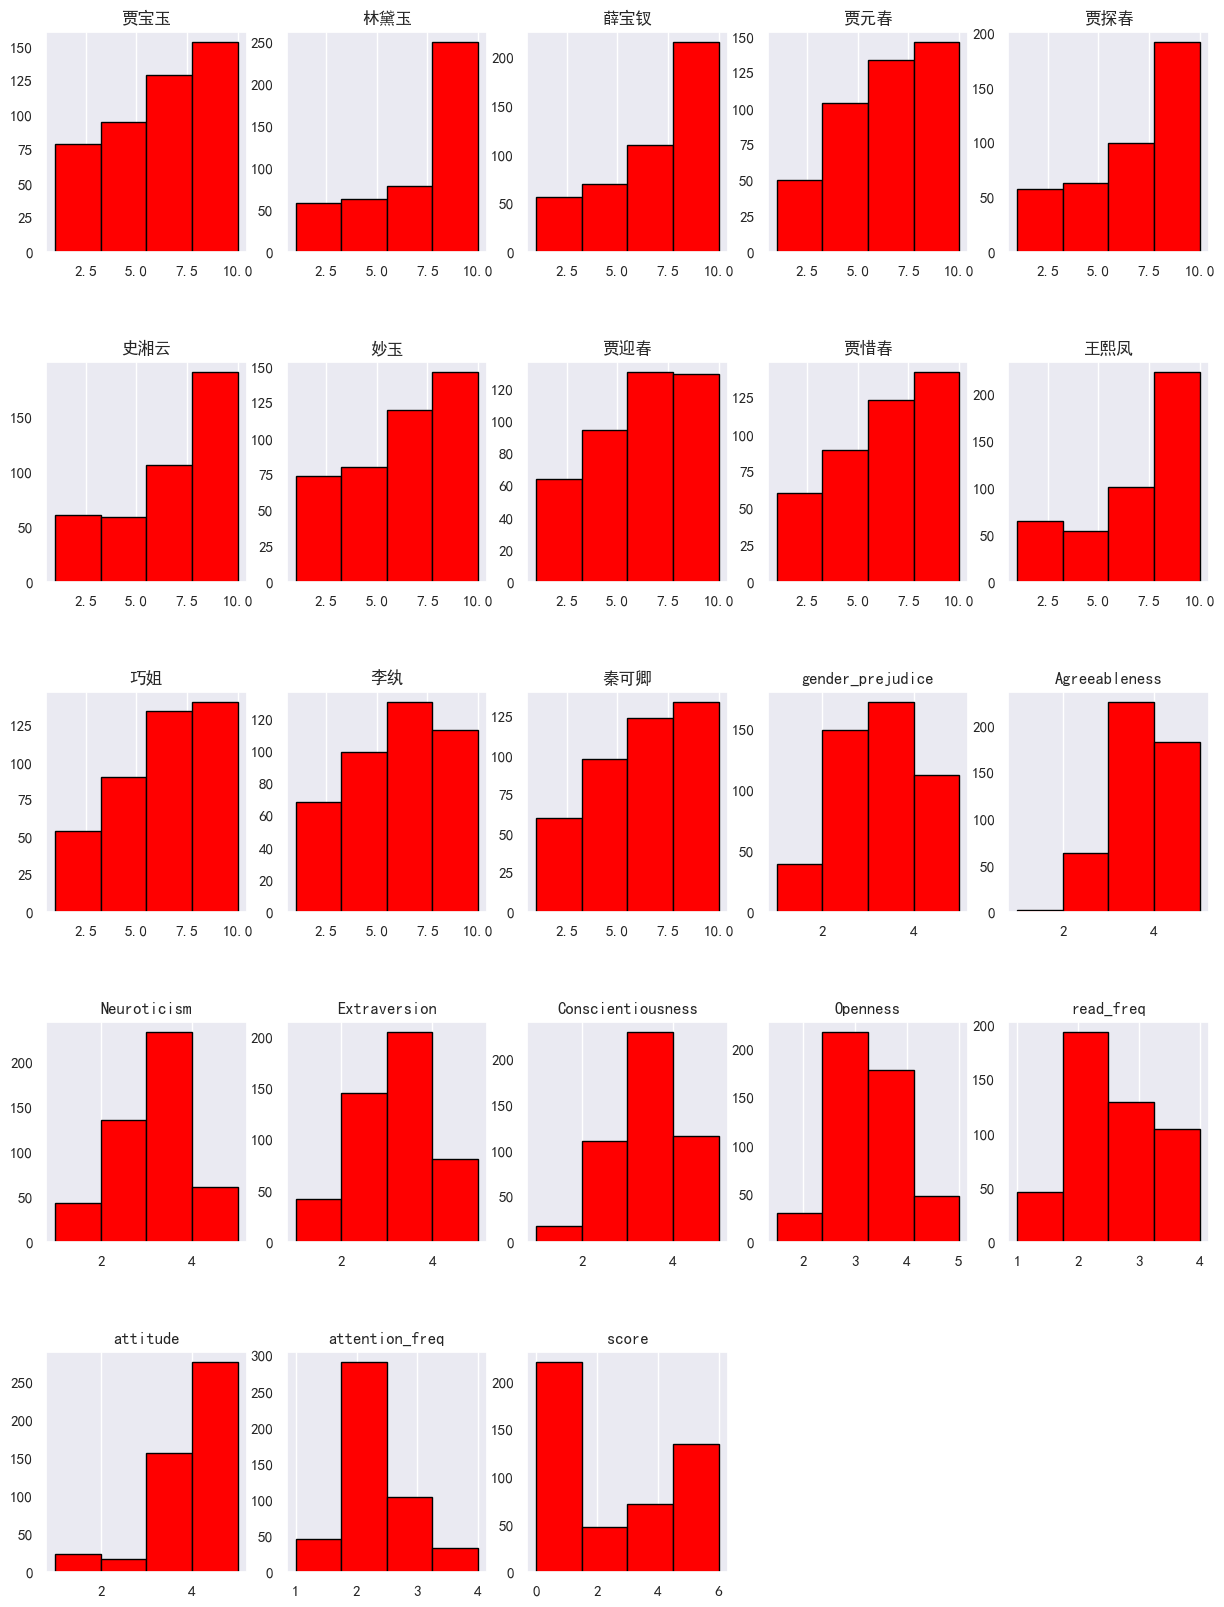

In [24]:
# Set the number of subplots per row
plots_per_row = 5
num_rows = (len(num_vars) - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each numeric variable
for i, var in enumerate(num_vars):
    ax = axes[i]
    df[var].hist(ax=ax, bins=4, color='red', edgecolor='black')
    ax.set_title(var)
    ax.grid(axis='y')

# Hide empty subplots if there are more than needed
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


### 2、类别变量/人口统计变量分析

In [25]:
# 针对每一列生成不同的值计数表格
value_counts_tables = {}
freq_tables = {}

for column in df_dem.columns:
    value_counts_tables[column] = df_dem[column].value_counts().sort_index()

# 打印每一列的值计数表格
for column, value_counts_table in value_counts_tables.items():
    print(f'人口统计变量-频数: {column}\n')
    print(value_counts_table)
    print('\n' + '-'*30 + '\n')

for column in df_dem.columns:
    freq_tables[column] = round(df_dem[column].value_counts(normalize=True)*100,2).sort_index()


# 打印每一列的值计数表格
for column, freq_table in freq_tables.items():
    print(f'人口统计变量-频率（百分比）: {column}\n')
    print(freq_tables)
    print('\n' + '-'*30 + '\n')

人口统计变量-频数: gender

gender
女    319
男    153
Name: count, dtype: int64

------------------------------

人口统计变量-频数: age

age
18岁及以下     34
19-25岁    309
26-34岁     82
35岁及以上     47
Name: count, dtype: int64

------------------------------

人口统计变量-频数: hukou

hukou
城镇户口     277
非城镇户口    195
Name: count, dtype: int64

------------------------------

人口统计变量-频数: education

education
高中及以下      47
大学        342
研究生及以上     83
Name: count, dtype: int64

------------------------------

人口统计变量-频数: major

major
中国语言文学类               76
其它人文社科类（非中国语言文学类）    207
理工医农类                142
Name: count, dtype: int64

------------------------------

人口统计变量-频率（百分比）: gender

{'gender': gender
女    67.58
男    32.42
Name: proportion, dtype: float64, 'age': age
18岁及以下     7.20
19-25岁    65.47
26-34岁    17.37
35岁及以上     9.96
Name: proportion, dtype: float64, 'hukou': hukou
城镇户口     58.69
非城镇户口    41.31
Name: proportion, dtype: float64, 'education': education
高中及以下      9.96
大学        72.46
研究生及以上    17.58
Name:

- **批量生成类别变量饼状图**

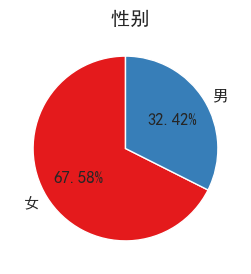

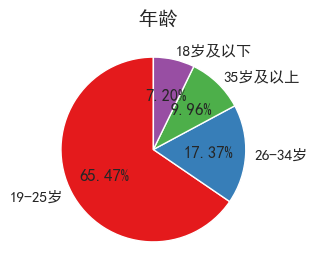

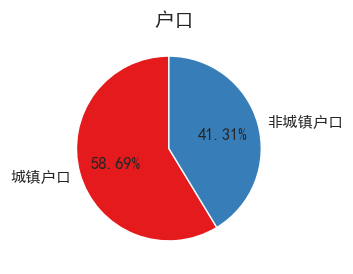

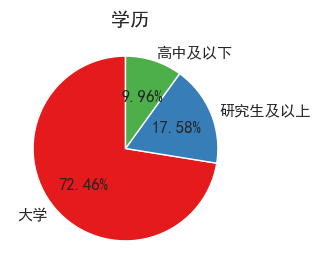

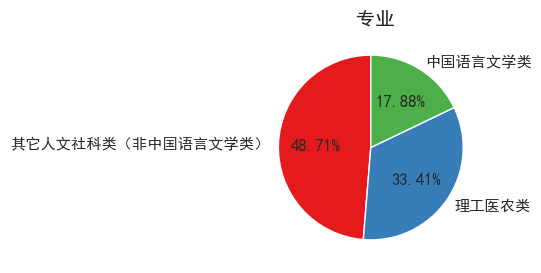

In [26]:
df_tmp = df_dem.copy()
df_tmp.columns = ['性别', '年龄', '户口', '学历', '专业']
# 针对每一列生成不同的图表
for column in df_tmp.columns:
    plt.figure(figsize=(4, 3))
    
    # 使用 Matplotlib 的 pie 函数
    df_tmp[column].value_counts().plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set1'))
    
    plt.title(f' {column}', fontweight='bold', fontsize=14)
    plt.ylabel('')  # 隐藏y轴标签
    
    plt.show()


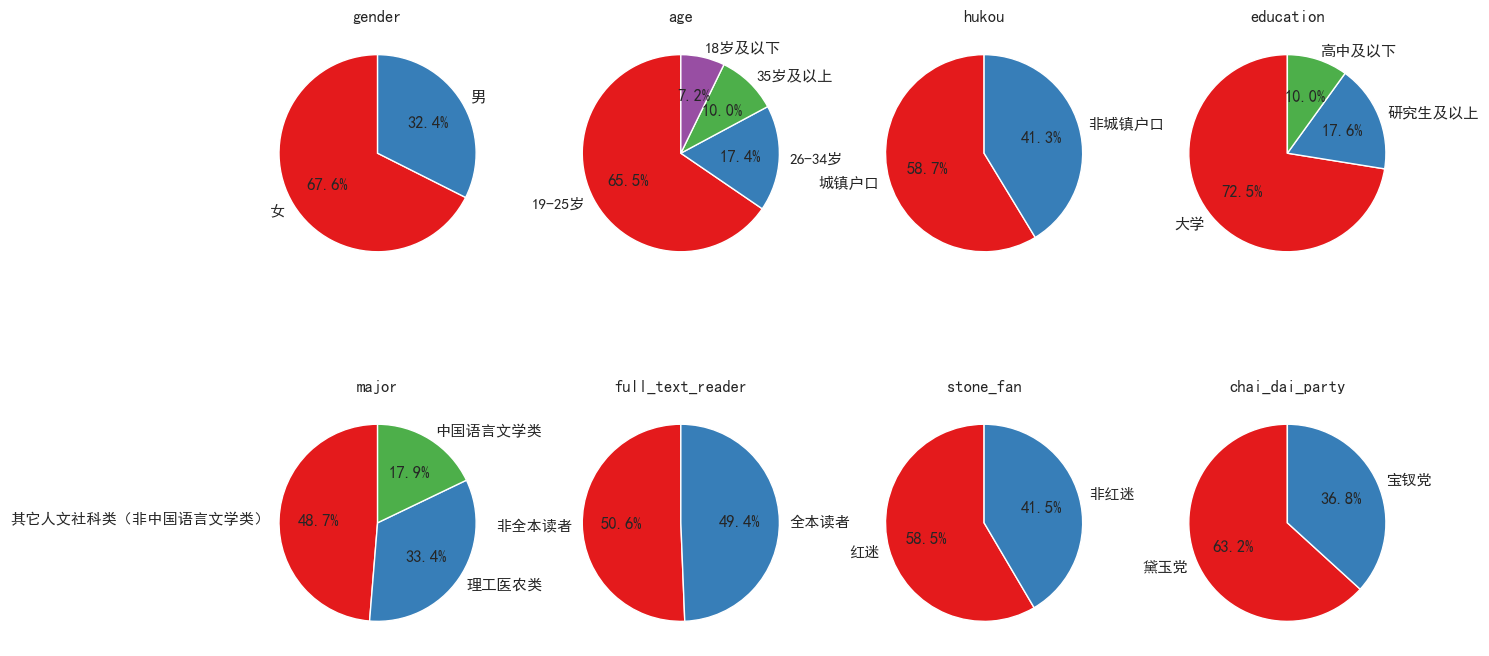

In [27]:
# Set the number of subplots per row
plots_per_row = 4
num_rows = (len(cat_vars) - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot pie charts for each categorical variable
for i, var in enumerate(cat_vars):
    ax = axes[i]
    df[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, colors=sns.color_palette('Set1'))
    ax.set_title(var)
    ax.set_ylabel('')  # Hide y-axis label    

# Hide empty subplots if there are more than needed
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    

plt.show()


In [80]:
# 饼状图
table_major = df.major.value_counts()#将major变量整理成表格
table_major

major
其它人文社科类（非中国语言文学类）    207
理工医农类                142
中国语言文学类               76
非大学及以上学历              47
Name: count, dtype: int64

#### 类别变量 + 数值变量——对比

In [28]:
# 存储均值的字典
means_dict = {}

result_df = pd.DataFrame(columns=df.loc[:, num_vars].columns)

# 遍历分组变量，计算均值并存储
for var in cat_vars:
    means_dict[var] = df.groupby(var).agg(num_dict).round(2).reset_index()  # Reset index here

# 打印结果
for var, means_df in means_dict.items():
    print(f"关于{var}平均值:")
    result_df = pd.concat([result_df, means_df.set_index(var)])  # Set index here
    print(means_df)
    print(result_df)
    print("\n" + '-' * 30 + "\n")

result_df.to_excel("./结果/类别变量+数值变量均值比较.xlsx")


关于gender平均值:
  gender   贾宝玉   林黛玉   薛宝钗   贾元春   贾探春   史湘云    妙玉   贾迎春   贾惜春  ...  \
0      女  6.34  7.72  7.37  6.60  7.17  7.26  6.44  6.40  6.52  ...   
1      男  5.61  5.95  5.75  5.73  5.75  5.50  5.40  5.37  5.58  ...   

   gender_prejudice  Agreeableness  Neuroticism  Extraversion  \
0              3.08           3.65         2.90          2.88   
1              3.28           3.18         2.84          3.01   

   Conscientiousness  Openness  read_freq  attitude  attention_freq  score  
0               3.20      3.33       2.70      3.84            2.37   3.09  
1               3.14      3.17       2.45      3.32            2.04   1.37  

[2 rows x 24 columns]
    贾宝玉   林黛玉   薛宝钗   贾元春   贾探春   史湘云    妙玉   贾迎春   贾惜春   王熙凤  ...  \
女  6.34  7.72  7.37  6.60  7.17  7.26  6.44  6.40  6.52  7.42  ...   
男  5.61  5.95  5.75  5.73  5.75  5.50  5.40  5.37  5.58  5.66  ...   

   gender_prejudice  Agreeableness  Neuroticism  Extraversion  \
女              3.08           3.65         2.90

In [29]:
# 存储均值的字典
means_dict = {}
cat_vars = choice_vars
result_df = pd.DataFrame(columns=df.loc[:, num_vars].columns)

# 遍历分组变量，计算均值并存储
for var in cat_vars:
    means_dict[var] = df.groupby(var).agg(num_dict).round(2).reset_index()  # Reset index here

# 打印结果
for var, means_df in means_dict.items():
    print(f"关于{var}平均值:")
    result_df = pd.concat([result_df, means_df.set_index(var)])  # Set index here
    print(means_df)
    print(result_df)
    print("\n" + '-' * 30 + "\n")

result_df.to_excel("./结果/类别变量+数值变量均值比较.xlsx")

关于央视版《红楼梦》（1987）平均值:
  央视版《红楼梦》（1987）   贾宝玉   林黛玉   薛宝钗   贾元春   贾探春   史湘云    妙玉   贾迎春   贾惜春  ...  \
0            未选中  5.39  5.84  5.79  5.60  5.45  5.38  5.30  5.43  5.54  ...   
1             选中  6.55  7.95  7.51  6.77  7.47  7.50  6.59  6.45  6.62  ...   

   gender_prejudice  Agreeableness  Neuroticism  Extraversion  \
0              3.37           3.29         2.92          3.07   
1              3.00           3.63         2.86          2.83   

   Conscientiousness  Openness  read_freq  attitude  attention_freq  score  
0               3.16      3.17       2.40      3.26            2.08   1.44  
1               3.19      3.35       2.75      3.92            2.38   3.22  

[2 rows x 24 columns]
      贾宝玉   林黛玉   薛宝钗   贾元春   贾探春   史湘云    妙玉   贾迎春   贾惜春   王熙凤  ...  \
未选中  5.39  5.84  5.79  5.60  5.45  5.38  5.30  5.43  5.54  5.46  ...   
选中   6.55  7.95  7.51  6.77  7.47  7.50  6.59  6.45  6.62  7.69  ...   

     gender_prejudice  Agreeableness  Neuroticism  Extraversion  \
未选中    

- **小提琴图**

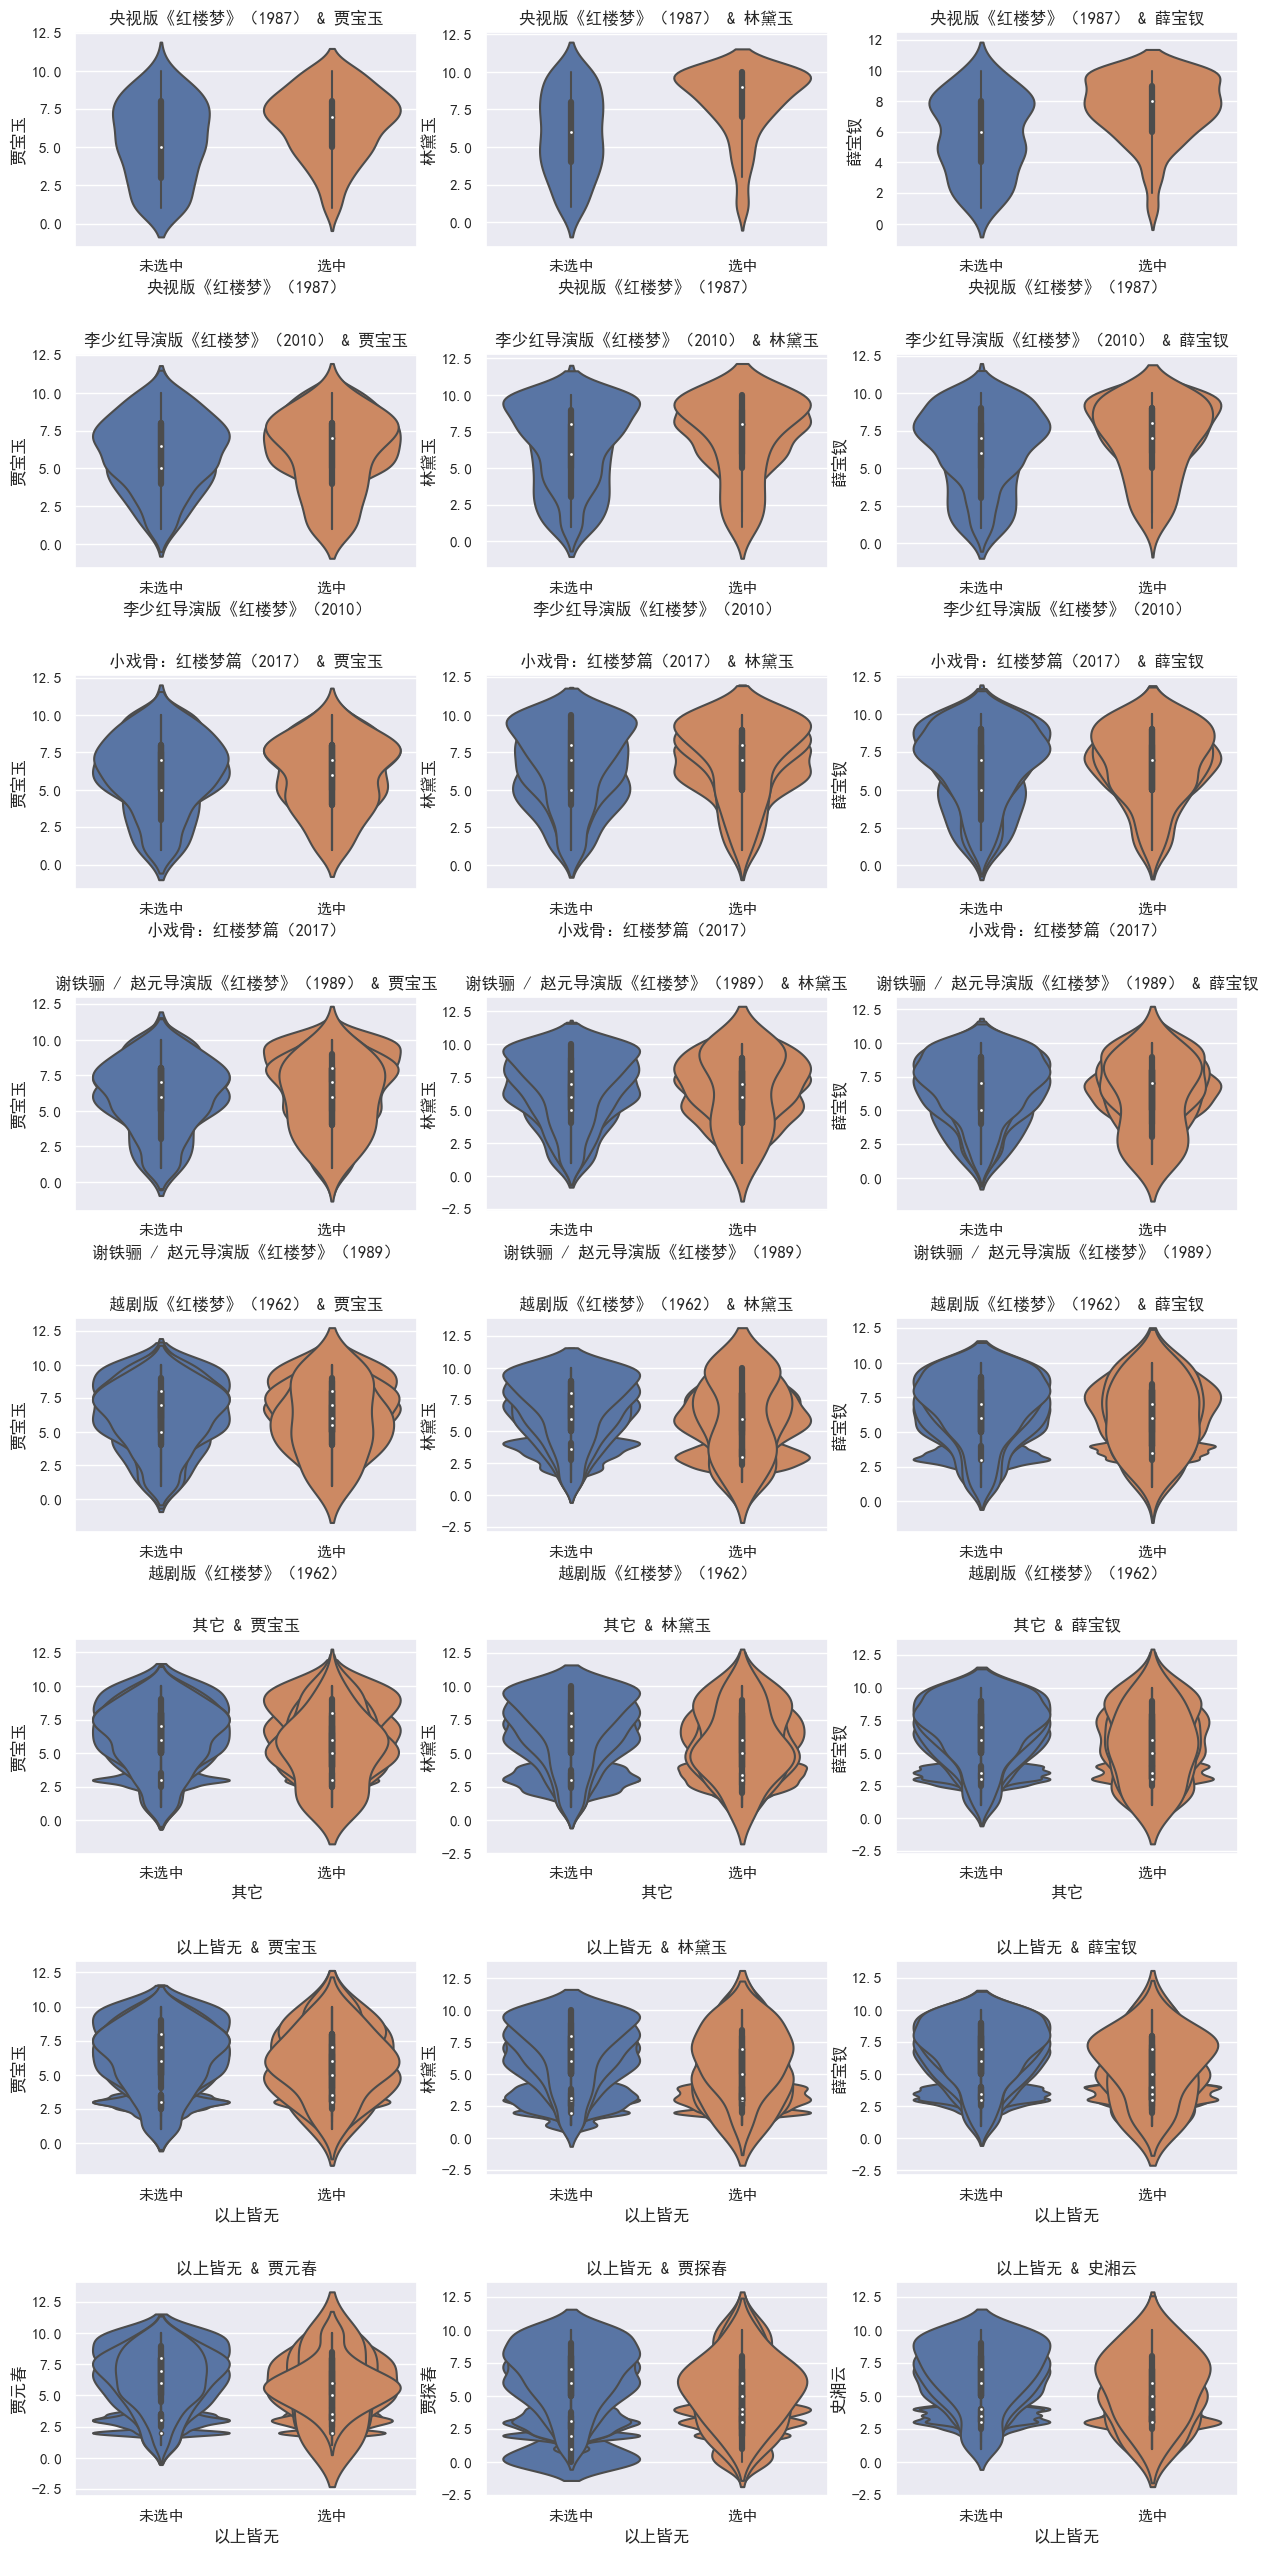

In [30]:
# Set the number of subplots per row
plots_per_row = 3
num_rows = (len(num_vars) - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through demographic variables
for i, cat_var in enumerate(cat_vars):
    for j, num_var in enumerate(num_vars):
        index = i * plots_per_row + j
        if index < len(axes):
            ax = axes[index]
            sns.violinplot(x=df[cat_var], y=df[num_var], ax=ax)
            ax.set_title(f'{cat_var} & {num_var}')

# Hide empty subplots if there are more than needed
for k in range(len(cat_vars) * len(num_vars), len(axes)):
    axes[k].axis('off')

plt.show()


### 读者变量分析

In [31]:
# 针对每一列生成不同的值计数表格
value_counts_tables = {}
freq_tables = {}

for column in df_id.columns:
    value_counts_tables[column] = df_id[column].value_counts()

# 打印每一列的值计数表格
for column, value_counts_table in value_counts_tables.items():
    print(f'读者变量-频数: {column}\n')
    print(value_counts_table)
    print('\n' + '-'*30 + '\n')

for column in df_id.columns:
    freq_tables[column] = round(df_id[column].value_counts(normalize=True)*100,2)


# 打印每一列的值计数表格
for column, freq_tables in freq_tables.items():
    print(f'读者变量-频率（百分比）: {column}\n')
    print(freq_tables)
    print('\n' + '-'*30 + '\n')

读者变量-频数: full_text_reader

full_text_reader
非全本读者    239
全本读者     233
Name: count, dtype: int64

------------------------------

读者变量-频数: stone_fan

stone_fan
红迷     276
非红迷    196
Name: count, dtype: int64

------------------------------

读者变量-频率（百分比）: full_text_reader

full_text_reader
非全本读者    50.64
全本读者     49.36
Name: proportion, dtype: float64

------------------------------

读者变量-频率（百分比）: stone_fan

stone_fan
红迷     58.47
非红迷    41.53
Name: proportion, dtype: float64

------------------------------



### 3、多选题分析

In [32]:
df_tmp = df.loc[:,choice_vars].apply(pd.value_counts).transpose()
df_tmp = df_tmp.assign(选中百分比=round(df_tmp['选中'] / len(df)*100,2))
df_tmp.iloc[:,1:3]

选中  选中百分比
央视版《红楼梦》（1987）          290  61.44
李少红导演版《红楼梦》（2010）       157  33.26
小戏骨：红楼梦篇（2017）          162  34.32
谢铁骊 / 赵元导演版《红楼梦》（1989）   51  10.81
越剧版《红楼梦》（1962）           46   9.75
其它                       27   5.72
以上皆无                     57  12.08

In [33]:
df_tmp = df[df["stone_fan"] == "红迷"].loc[:,choice_vars].apply(pd.value_counts).transpose()
df_tmp = df_tmp.assign(选中百分比=round(df_tmp['选中'] / len(df_fan)*100,2))
df_tmp.iloc[:,1:3]

选中  选中百分比
央视版《红楼梦》（1987）          207  75.00
李少红导演版《红楼梦》（2010）        97  35.14
小戏骨：红楼梦篇（2017）          107  38.77
谢铁骊 / 赵元导演版《红楼梦》（1989）   30  10.87
越剧版《红楼梦》（1962）           28  10.14
其它                       14   5.07
以上皆无                     17   6.16

In [34]:
df_tmp = df[df["stone_fan"] == "非红迷"].loc[:,choice_vars].apply(pd.value_counts).transpose()
df_tmp = df_tmp.assign(选中百分比=round(df_tmp['选中'] / len(df_non_fan)*100,2))
df_tmp.iloc[:,1:3]

选中  选中百分比
央视版《红楼梦》（1987）          83  42.35
李少红导演版《红楼梦》（2010）       60  30.61
小戏骨：红楼梦篇（2017）          55  28.06
谢铁骊 / 赵元导演版《红楼梦》（1989）  21  10.71
越剧版《红楼梦》（1962）          18   9.18
其它                      13   6.63
以上皆无                    40  20.41

In [35]:
# 从没读过《红楼梦》的群体
df_tmp = df[df["read_freq"] == 1].loc[:,choice_vars].apply(pd.value_counts).transpose()
df_tmp = df_tmp.assign(选中百分比=round(df_tmp['选中'] / len(df[df["read_freq"] == 1])*100,2))
df_tmp.iloc[:,1:3]

选中  选中百分比
央视版《红楼梦》（1987）          15  32.61
李少红导演版《红楼梦》（2010）       11  23.91
小戏骨：红楼梦篇（2017）           8  17.39
谢铁骊 / 赵元导演版《红楼梦》（1989）   3   6.52
越剧版《红楼梦》（1962）           0   0.00
其它                       1   2.17
以上皆无                    20  43.48

### 4、全本读者与非全本读者 & 红迷与非红迷 差异分析

In [36]:
# 针对每一列生成不同的值计数表格
value_counts_tables = {}
freq_tables = {}

for column in df.loc[:,id_vars].columns:
    value_counts_tables[column] = df.loc[:,id_vars][column].value_counts()

# 打印每一列的值计数表格
for column, value_counts_table in value_counts_tables.items():
    print(f'读者身份-频数: {column}\n')
    print(value_counts_table)
    print('\n' + '-'*30 + '\n')

for column in df.loc[:,id_vars].columns:
    freq_tables[column] = round(df.loc[:,id_vars][column].value_counts(normalize=True)*100,0)


# 打印每一列的值计数表格
for column, freq_tables in freq_tables.items():
    print(f'读者身份-频率（百分比）: {column}\n')
    print(freq_tables)
    print('\n' + '-'*30 + '\n')

读者身份-频数: full_text_reader

full_text_reader
非全本读者    239
全本读者     233
Name: count, dtype: int64

------------------------------

读者身份-频数: stone_fan

stone_fan
红迷     276
非红迷    196
Name: count, dtype: int64

------------------------------

读者身份-频率（百分比）: full_text_reader

full_text_reader
非全本读者    51.0
全本读者     49.0
Name: proportion, dtype: float64

------------------------------

读者身份-频率（百分比）: stone_fan

stone_fan
红迷     58.0
非红迷    42.0
Name: proportion, dtype: float64

------------------------------



#### 人口统计学差异分析


####  《红楼梦》接触差异分析


In [37]:
df.groupby("full_text_reader").agg(stone_dict).round(2)

read_freq  attitude  attention_freq  score
full_text_reader                                            
全本读者                   3.45      3.97            2.53   3.19
非全本读者                  1.81      3.38            2.00   1.89

In [38]:
df.groupby("stone_fan").agg(stone_dict).round(2)

read_freq  attitude  attention_freq  score
stone_fan                                            
红迷              2.89      4.37            2.46   3.42
非红迷             2.23      2.68            1.98   1.29

####  人格、性别偏见差异分析


In [39]:
df.groupby("full_text_reader").agg(pp_dict).round(2).transpose()

full_text_reader   全本读者  非全本读者
gender_prejudice   3.11   3.17
Agreeableness      3.47   3.53
Neuroticism        2.91   2.85
Extraversion       2.88   2.97
Conscientiousness  3.18   3.19
Openness           3.32   3.23

In [40]:
df.groupby("stone_fan").agg(pp_dict).round(2).transpose()

stone_fan            红迷   非红迷
gender_prejudice   3.07  3.24
Agreeableness      3.64  3.31
Neuroticism        2.89  2.88
Extraversion       2.86  3.01
Conscientiousness  3.22  3.12
Openness           3.34  3.19

####  小说人物喜欢度差异分析


In [41]:
df.groupby("full_text_reader").agg(chars_dict).round(2).transpose()

full_text_reader  全本读者  非全本读者
贾宝玉               5.93   6.30
林黛玉               7.38   6.96
薛宝钗               6.85   6.90
贾元春               6.32   6.37
贾探春               6.93   6.50
史湘云               6.76   6.68
妙玉                5.98   6.31
贾迎春               5.98   6.21
贾惜春               6.11   6.39
王熙凤               6.85   6.90
巧姐                6.22   6.42
李纨                5.85   6.19
秦可卿               6.05   6.29

In [42]:
df.groupby("stone_fan").agg(chars_dict).round(2).transpose()

stone_fan    红迷   非红迷
贾宝玉        6.41  5.68
林黛玉        7.82  6.19
薛宝钗        7.21  6.38
贾元春        6.66  5.82
贾探春        7.21  5.93
史湘云        7.16  6.01
妙玉         6.29  5.87
贾迎春        6.24  5.80
贾惜春        6.46  5.85
王熙凤        7.31  6.21
巧姐         6.53  5.96
李纨         6.19  5.71
秦可卿        6.36  5.83

####  逻辑回归分析影响全本阅读《红楼梦》的因素


In [43]:
import statsmodels.api as sm

# 将目标变量进行独热编码
df_encoded = pd.get_dummies(df, columns=['gender', 'age', 'hukou', 'education', 'major','full_text_reader','stone_fan'], drop_first=False)
df_encoded.columns

Index(['央视版《红楼梦》（1987）', '李少红导演版《红楼梦》（2010）', '小戏骨：红楼梦篇（2017）',
       '谢铁骊 / 赵元导演版《红楼梦》（1989）', '越剧版《红楼梦》（1962）', '其它', '以上皆无', 'test_1',
       'test_2', 'test_3',
       ...
       'education_高中及以下', 'education_大学', 'education_研究生及以上', 'major_中国语言文学类',
       'major_其它人文社科类（非中国语言文学类）', 'major_理工医农类', 'full_text_reader_全本读者',
       'full_text_reader_非全本读者', 'stone_fan_红迷', 'stone_fan_非红迷'],
      dtype='object', length=107)

In [44]:
# 将布尔类型因变量转换为0和1
df_encoded.loc[:,'gender_女':'stone_fan_非红迷'] = df_encoded.loc[:,'gender_女':'stone_fan_非红迷'].astype(int)

In [45]:
# 添加截距列
X = sm.add_constant(df_encoded[[ 'gender_男', 'age_19-25岁', 'age_26-34岁', 'age_35岁及以上', 'hukou_非城镇户口', 'education_大学', 'education_研究生及以上', 'major_其它人文社科类（非中国语言文学类）', 'major_理工医农类']+pp_vars])

# 将布尔类型因变量转换为0和1
y = df_encoded['full_text_reader_全本读者'].astype(int)
# 初始化逻辑回归模型
model = sm.Logit(y, X)

# 拟合模型
result = model.fit()

# 打印模型摘要
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650828
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     full_text_reader_全本读者   No. Observations:                  472
Model:                             Logit   Df Residuals:                      456
Method:                              MLE   Df Model:                           15
Date:                   Mon, 06 Jan 2025   Pseudo R-squ.:                 0.06094
Time:                           03:34:02   Log-Likelihood:                -307.19
converged:                          True   LL-Null:                       -327.13
Covariance Type:               nonrobust   LLR p-value:                 0.0004739
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3912      1.204      1.156  

In [46]:
# 添加截距列
X = sm.add_constant(df_encoded[[ 'gender_男', 'age_19-25岁', 'age_26-34岁', 'age_35岁及以上', 'hukou_非城镇户口', 'education_大学', 'education_研究生及以上', 'major_其它人文社科类（非中国语言文学类）', 'major_理工医农类']+pp_vars])

# 将布尔类型因变量转换为0和1
y = df_encoded['stone_fan_红迷'].astype(int)
# 初始化逻辑回归模型
model = sm.Logit(y, X)

# 拟合模型
result = model.fit()

# 打印模型摘要
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.624883
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           stone_fan_红迷   No. Observations:                  472
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                 0.07931
Time:                        03:34:04   Log-Likelihood:                -294.94
converged:                       True   LL-Null:                       -320.35
Covariance Type:            nonrobust   LLR p-value:                 8.852e-06
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5645      1.228     -1.274      0.203      -3.971   

#### 《红楼梦》人物熟悉度分析

In [47]:
df_tmp = df.filter(regex=".*_score").apply(pd.value_counts).transpose()
df_tmp.rename(columns={1.0: '回答正确'}, inplace=True)  # 将修改后的结果重新赋值给 DataFrame 或者使用 inplace=True
df_tmp["正确率"] = round(df_tmp["回答正确"] / len(df) * 100, 2)  # 直接更新原始 DataFrame 的列
df_tmp.iloc[:, 1:3]

回答正确    正确率
test_1_score   168  35.59
test_2_score   198  41.95
test_3_score   230  48.73
test_4_score   191  40.47
test_5_score   206  43.64
test_6_score   203  43.01

In [48]:
df_tmp = df_fan.filter(regex=".*_score").apply(pd.value_counts).transpose()
df_tmp.rename(columns={1.0: '回答正确'}, inplace=True)  # 将修改后的结果重新赋值给 DataFrame 或者使用 inplace=True
df_tmp["正确率"] = round(df_tmp["回答正确"] / len(df_fan) * 100, 2)  # 直接更新原始 DataFrame 的列
df_tmp.iloc[:, 1:3]

回答正确    正确率
test_1_score   135  48.91
test_2_score   154  55.80
test_3_score   183  66.30
test_4_score   147  53.26
test_5_score   161  58.33
test_6_score   163  59.06

In [49]:
df_tmp = df_reader.filter(regex=".*_score").apply(pd.value_counts).transpose()
df_tmp.rename(columns={1.0: '回答正确'}, inplace=True)  # 将修改后的结果重新赋值给 DataFrame 或者使用 inplace=True
df_tmp["正确率"] = round(df_tmp["回答正确"] / len(df_reader) * 100, 2)  # 直接更新原始 DataFrame 的列
df_tmp.iloc[:, 1:3]

回答正确    正确率
test_1_score   104  44.64
test_2_score   122  52.36
test_3_score   144  61.80
test_4_score   111  47.64
test_5_score   133  57.08
test_6_score   130  55.79

#### 5、《红楼梦》人物喜爱度分析

In [50]:
vars_to_groupby = id_vars + dem_vars
# 创建一个空的 DataFrame 来存储聚合结果
result_df = pd.DataFrame()

# 循环遍历每个变量并进行聚合
for var in vars_to_groupby:
    # 使用 agg 进行聚合，并将结果添加到 result_df
    agg_result = df.groupby(var).agg(chars_dict, skipna=True).round(2).transpose()
    result_df = pd.concat([result_df, agg_result],axis=1)

# 总体平均人物喜爱度DataFrame
mean_chars_fav = df.agg(chars_dict, skipna=True).round(2).transpose()
mean_chars_fav_df = pd.DataFrame(mean_chars_fav, columns=['整体'])

# 打印最终的聚合结果
chars_fav_df = pd.concat([mean_chars_fav_df, result_df],axis=1)
print(chars_fav_df)
# chars_fav_df.to_excel('人口统计学变量与小说人物喜爱度.xlsx')

       整体  全本读者  非全本读者    红迷   非红迷     女     男  18岁及以下  19-25岁  26-34岁  \
贾宝玉  6.12  5.93   6.30  6.41  5.68  6.34  5.61    4.58    6.19    5.86   
林黛玉  7.17  7.38   6.96  7.82  6.19  7.72  5.95    5.23    7.26    6.99   
薛宝钗  6.88  6.85   6.90  7.21  6.38  7.37  5.75    4.71    6.95    6.96   
贾元春  6.34  6.32   6.37  6.66  5.82  6.60  5.73    4.88    6.43    6.47   
贾探春  6.73  6.93   6.50  7.21  5.93  7.17  5.75    4.91    6.71    7.11   
史湘云  6.72  6.76   6.68  7.16  6.01  7.26  5.50    4.75    6.61    7.11   
妙玉   6.13  5.98   6.31  6.29  5.87  6.44  5.40    4.76    6.25    5.95   
贾迎春  6.08  5.98   6.21  6.24  5.80  6.40  5.37    5.00    6.22    5.77   
贾惜春  6.23  6.11   6.39  6.46  5.85  6.52  5.58    4.82    6.39    6.16   
王熙凤  6.87  6.85   6.90  7.31  6.21  7.42  5.66    4.42    6.97    6.95   
巧姐   6.31  6.22   6.42  6.53  5.96  6.66  5.50    4.77    6.37    6.33   
李纨   6.01  5.85   6.19  6.19  5.71  6.19  5.59    4.52    6.11    6.07   
秦可卿  6.16  6.05   6.29  6.36  5.83  6.

- **🎉条形图**

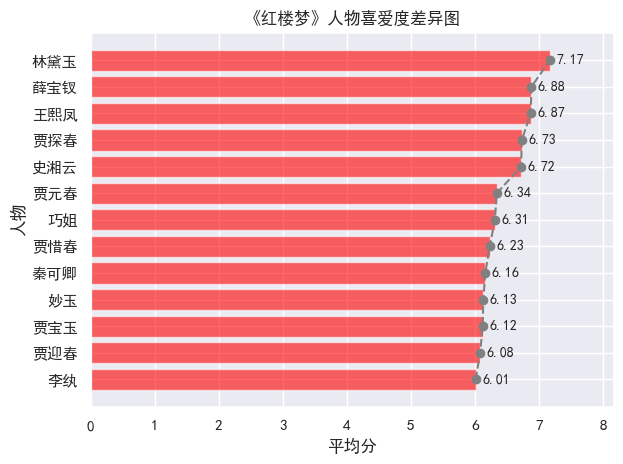

In [52]:
# 排序，确保按照分数的顺序排列
average_df_reset = chars_fav_df["整体"].reset_index().sort_values(by='整体', ascending=True)

# 创建条形图
plt.barh(average_df_reset['index'], average_df_reset['整体'], color='red', alpha=0.6)
plt.xlabel('平均分')
plt.ylabel('人物')
plt.title('《红楼梦》人物喜爱度差异图')

# 在每个条形上标注得分
for index, value in enumerate(average_df_reset['整体']):
    plt.text(value + 0.1, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

# 设置 x 轴取值范围
plt.xlim(0, max(average_df_reset['整体']) + 1)

# 添加效果的虚线
plt.plot(average_df_reset['整体'], average_df_reset['index'], marker='o', linestyle='--', color='gray')

# 显示图形
plt.tight_layout()  # 调整布局，防止标签重叠
plt.show()

- **🎉雷达图**

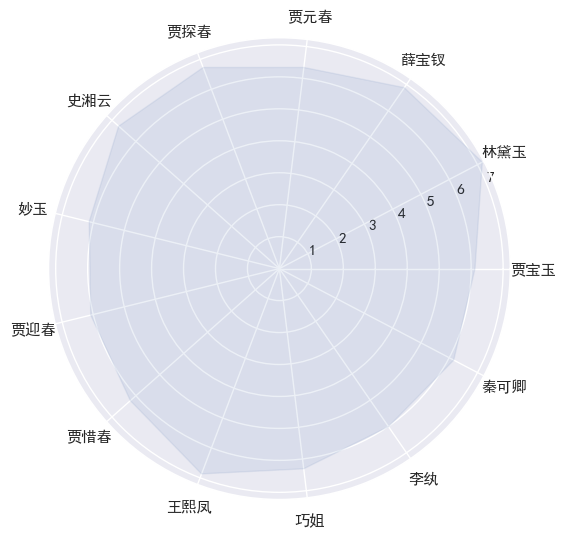

In [82]:
# 创建一个示例数据
categories = chars_fav_df['整体'].index
values = chars_fav_df['整体'].values

# 计算角度
theta = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# 将最后一个点闭合
values = np.concatenate((values, [values[0]]))
theta = np.concatenate((theta, [theta[0]]))

# 画雷达图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(theta, values, color='b', alpha=0.1)

# 添加刻度标签
ax.set_xticks(theta[:-1])
ax.set_xticklabels(categories)

# 显示图形
plt.show()



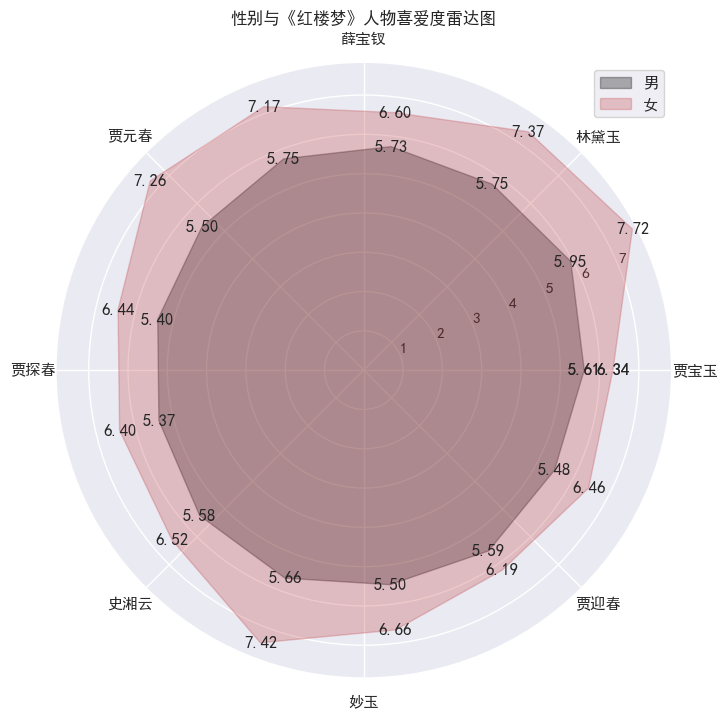

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
categories = chars_fav_df.index
values_series1 = chars_fav_df['男'].values
values_series2 = chars_fav_df['女'].values

# 计算角度
theta = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# 将最后一个点闭合
values_series1 = np.concatenate((values_series1, [values_series1[0]]))
values_series2 = np.concatenate((values_series2, [values_series2[0]]))
theta = np.concatenate((theta, [theta[0]]))

# 画雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 画第一个数据系列
ax.fill(theta, values_series1, color='black', alpha=0.3, label='男')
# 在雷达图上标记具体数值
for angle, value in zip(theta, values_series1):
    ax.text(angle, value, f'{value:.2f}', ha='center', va='center')

# 画第二个数据系列
ax.fill(theta, values_series2, color='r', alpha=0.3, label='女')
# 在雷达图上标记具体数值
for angle, value in zip(theta, values_series2):
    ax.text(angle, value, f'{value:.2f}', ha='center', va='center')

# 添加刻度标签
# ax.set_xticks(theta[:-1])
ax.set_xticklabels(categories)

# 添加图例
ax.legend()
plt.title('性别与《红楼梦》人物喜爱度雷达图')
# 显示图形
plt.show()


- **🎉横向条形图**

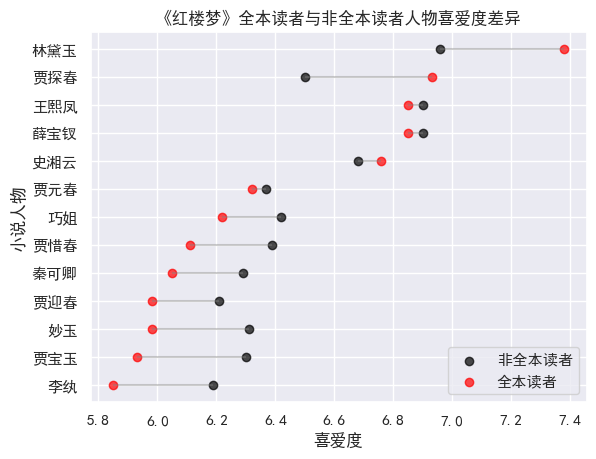

In [75]:
ordered_df = result_df.loc[:,"全本读者":"非全本读者"].reset_index().sort_values(by='全本读者')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['非全本读者'], xmax=ordered_df['全本读者'], color='grey', alpha=0.4)
plt.scatter(ordered_df['非全本读者'], my_range, color='black', alpha=0.7 , label='非全本读者')
plt.scatter(ordered_df['全本读者'], my_range, color='red', alpha=0.7, label='全本读者')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("《红楼梦》全本读者与非全本读者人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

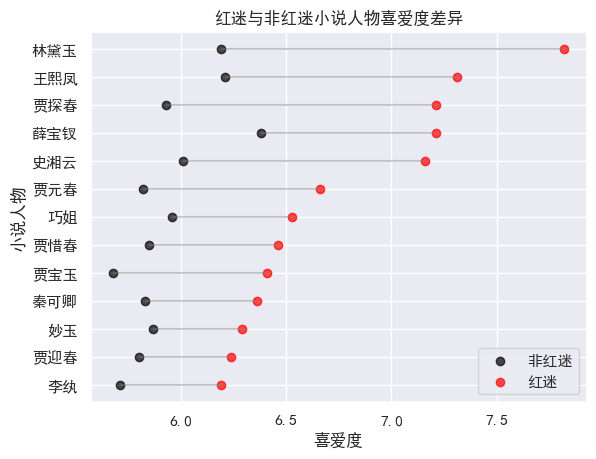

In [74]:
ordered_df = result_df.loc[:,"红迷":"非红迷"].reset_index().sort_values(by='红迷')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['非红迷'], xmax=ordered_df['红迷'], color='grey', alpha=0.4)
plt.scatter(ordered_df['非红迷'], my_range, color='black', alpha=0.7 , label='非红迷')
plt.scatter(ordered_df['红迷'], my_range, color='red', alpha=0.7, label='红迷')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("红迷与非红迷小说人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

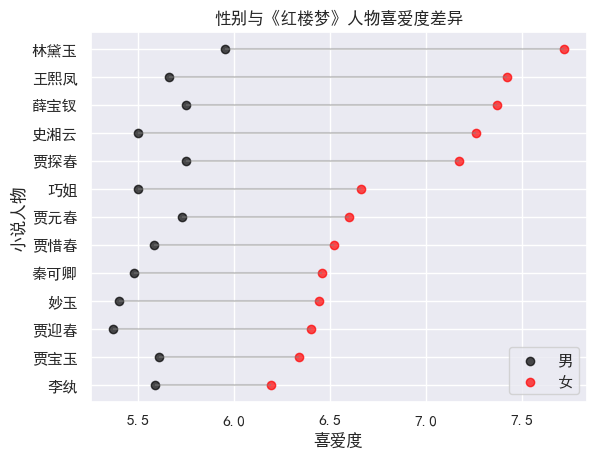

In [311]:
ordered_df = result_df.loc[:,"女":"男"].reset_index().sort_values(by='女')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['男'], xmax=ordered_df['女'], color='grey', alpha=0.4)
plt.scatter(ordered_df['男'], my_range, color='black', alpha=0.7 , label='男')
plt.scatter(ordered_df['女'], my_range, color='red', alpha=0.7, label='女')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("性别与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

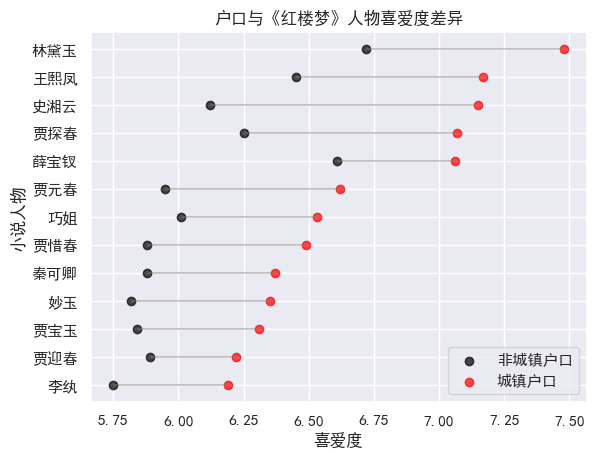

In [261]:
ordered_df = result_df.loc[:,"城镇户口":"非城镇户口"].reset_index().sort_values(by='城镇户口')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['非城镇户口'], xmax=ordered_df['城镇户口'], color='grey', alpha=0.4)
plt.scatter(ordered_df['非城镇户口'], my_range, color='black', alpha=0.7 , label='非城镇户口')
plt.scatter(ordered_df['城镇户口'], my_range, color='red', alpha=0.7, label='城镇户口')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("户口与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

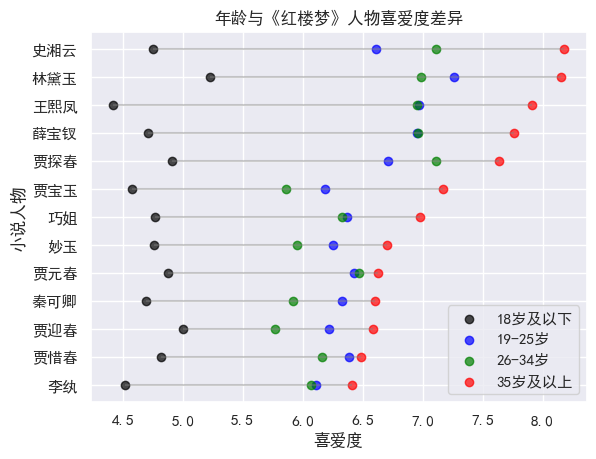

In [310]:
ordered_df = result_df.loc[:,"18岁及以下":"35岁及以上"].reset_index().sort_values(by='35岁及以上')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)

xmin_values = ordered_df.iloc[:, 1:].min(axis=1)
xmax_values = ordered_df.iloc[:, 1:].max(axis=1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=xmin_values , xmax=xmax_values , color='grey', alpha=0.4)
plt.scatter(ordered_df['18岁及以下'], my_range, color='black', alpha=0.7, label='18岁及以下')
plt.scatter(ordered_df['19-25岁'], my_range, color='blue', alpha=0.7, label='19-25岁')
plt.scatter(ordered_df['26-34岁'], my_range, color='green', alpha=0.7, label='26-34岁')
plt.scatter(ordered_df['35岁及以上'], my_range, color='red', alpha=0.7, label='35岁及以上')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("年龄与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

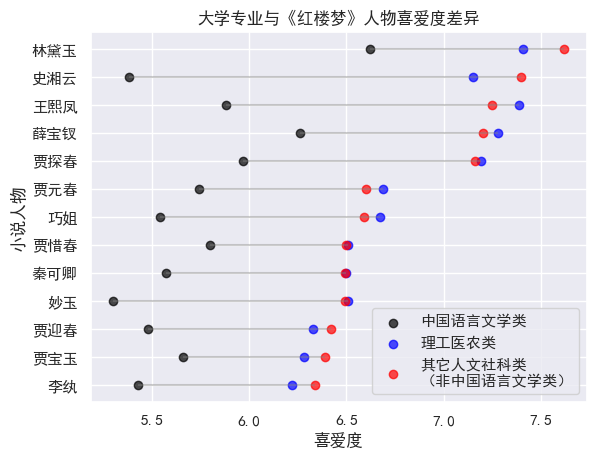

In [312]:
ordered_df = result_df.loc[:,"中国语言文学类":"理工医农类"].reset_index().sort_values(by='其它人文社科类（非中国语言文学类）')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)
 
xmin_values = ordered_df.iloc[:, 1:].min(axis=1)
xmax_values = ordered_df.iloc[:, 1:].max(axis=1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=xmin_values , xmax=xmax_values , color='grey', alpha=0.4)
plt.scatter(ordered_df['中国语言文学类'], my_range, color='black', alpha=0.7, label='中国语言文学类')
plt.scatter(ordered_df['理工医农类'], my_range, color='blue', alpha=0.7, label='理工医农类')
plt.scatter(ordered_df['其它人文社科类（非中国语言文学类）'], my_range, color='red', alpha=0.7, label='其它人文社科类\n（非中国语言文学类）')

# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("大学专业与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

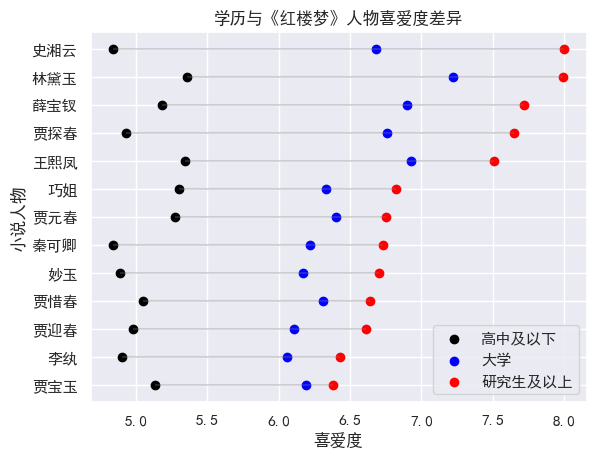

In [304]:
ordered_df = result_df.loc[:,"大学":"高中及以下"].reset_index().sort_values(by='研究生及以上')
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)
 
xmin_values = ordered_df.iloc[:, 1:].min(axis=1)
xmax_values = ordered_df.iloc[:, 1:].max(axis=1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=xmin_values , xmax=xmax_values , color='grey', alpha=0.3)
plt.scatter(ordered_df['高中及以下'], my_range, color='black', alpha=1, label='高中及以下')
plt.scatter(ordered_df['大学'], my_range, color='blue', alpha=1, label='大学')
plt.scatter(ordered_df['研究生及以上'], my_range, color='red', alpha=1, label='研究生及以上')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("学历与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

- **id与《红楼梦》喜爱度**

In [114]:
vars_to_groupby2 = ["read_freq", "attitude"] 
# 创建一个空的 DataFrame 来存储聚合结果
result_df2 = pd.DataFrame()

# 循环遍历每个变量并进行聚合
for var in vars_to_groupby2:
    # 使用 agg 进行聚合，并将结果添加到 result_df
    agg_result = df.groupby(var).agg(chars_dict, skipna=True).round(2).transpose()
    result_df2 = pd.concat([result_df2, agg_result],axis=1)

# 打印最终的聚合结果
print(result_df2)
# result_df2.to_excel('不同类型读者与《红楼梦》人物喜爱度.xlsx')

      1.0   2.0   3.0   4.0   1.0   2.0   3.0   4.0   5.0
贾宝玉  6.06  6.34  5.66  6.28  5.22  5.00  5.82  6.44  6.36
林黛玉  6.12  7.10  6.89  7.99  4.53  5.60  6.47  7.60  8.20
薛宝钗  6.20  7.03  6.67  7.07  4.91  5.87  6.66  7.17  7.27
贾元春  6.26  6.39  6.26  6.40  5.23  4.31  6.08  6.83  6.39
贾探春  6.44  6.51  6.30  7.70  4.85  5.46  6.16  6.90  7.71
史湘云  6.27  6.74  6.10  7.56  4.52  5.42  6.34  7.01  7.40
妙玉   6.00  6.36  5.85  6.14  4.78  5.85  6.07  6.39  6.14
贾迎春  6.67  6.13  5.98  5.97  5.57  5.69  5.86  6.39  6.01
贾惜春  5.89  6.47  6.06  6.16  5.14  5.69  5.99  6.56  6.29
王熙凤  6.62  6.95  6.60  7.16  4.96  5.50  6.49  7.27  7.36
巧姐   5.92  6.50  6.24  6.19  5.65  5.15  6.10  6.60  6.42
李纨   5.92  6.24  5.88  5.82  4.87  5.46  5.90  6.35  5.93
秦可卿  6.27  6.30  5.88  6.26  5.27  4.77  6.05  6.44  6.24


In [115]:
result_df2.iloc[:,0:4].reset_index().sort_values(by=4.0)

index   1.0   2.0   3.0   4.0
11    李纨  5.92  6.24  5.88  5.82
7    贾迎春  6.67  6.13  5.98  5.97
6     妙玉  6.00  6.36  5.85  6.14
8    贾惜春  5.89  6.47  6.06  6.16
10    巧姐  5.92  6.50  6.24  6.19
12   秦可卿  6.27  6.30  5.88  6.26
0    贾宝玉  6.06  6.34  5.66  6.28
3    贾元春  6.26  6.39  6.26  6.40
2    薛宝钗  6.20  7.03  6.67  7.07
9    王熙凤  6.62  6.95  6.60  7.16
5    史湘云  6.27  6.74  6.10  7.56
4    贾探春  6.44  6.51  6.30  7.70
1    林黛玉  6.12  7.10  6.89  7.99

In [116]:
ordered_df

index  全本读者  非全本读者
11    李纨  5.85   6.19
0    贾宝玉  5.93   6.30
6     妙玉  5.98   6.31
7    贾迎春  5.98   6.21
12   秦可卿  6.05   6.29
8    贾惜春  6.11   6.39
10    巧姐  6.22   6.42
3    贾元春  6.32   6.37
5    史湘云  6.76   6.68
2    薛宝钗  6.85   6.90
9    王熙凤  6.85   6.90
4    贾探春  6.93   6.50
1    林黛玉  7.38   6.96

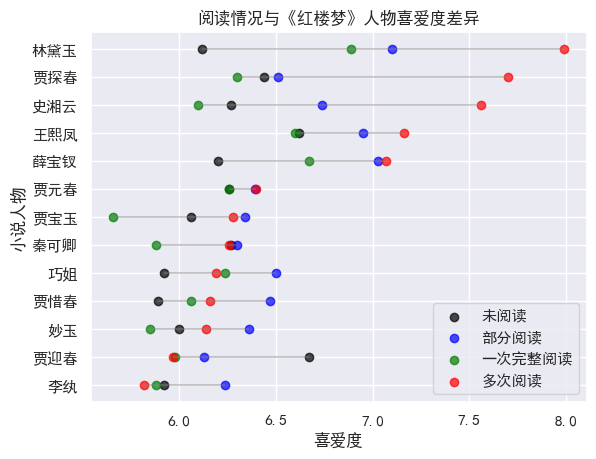

In [118]:
ordered_df = result_df2.iloc[:,0:4].reset_index().sort_values(by=4.0)
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)

xmin_values = ordered_df.iloc[:, 1:].min(axis=1)
xmax_values = ordered_df.iloc[:, 1:].max(axis=1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=xmin_values , xmax=xmax_values , color='grey', alpha=0.4)
plt.scatter(ordered_df[1.0], my_range, color='black', alpha=0.7, label='未阅读')
plt.scatter(ordered_df[2.0], my_range, color='blue', alpha=0.7, label='部分阅读')
plt.scatter(ordered_df[3.0], my_range, color='green', alpha=0.7, label='一次完整阅读')
plt.scatter(ordered_df[4.0], my_range, color='red', alpha=0.7, label='多次阅读')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("阅读情况与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

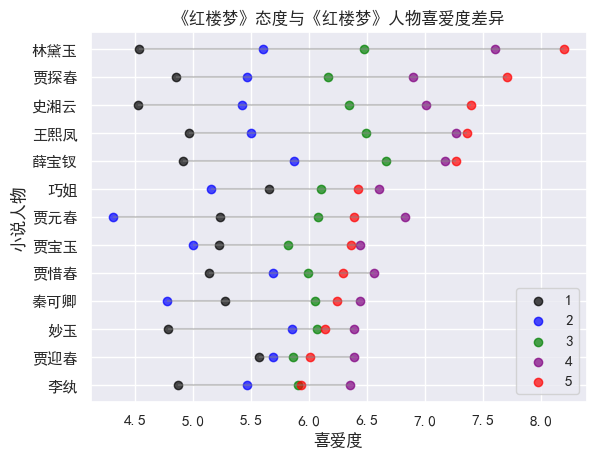

In [119]:
ordered_df = result_df2.iloc[:,4:].reset_index().sort_values(by=5.0)
# Reorder it following the values of the first value:
my_range=range(1,len(ordered_df.index)+1)

xmin_values = ordered_df.iloc[:, 1:].min(axis=1)
xmax_values = ordered_df.iloc[:, 1:].max(axis=1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=xmin_values , xmax=xmax_values , color='grey', alpha=0.4)
plt.scatter(ordered_df[1.0], my_range, color='black', alpha=0.7, label='1')
plt.scatter(ordered_df[2.0], my_range, color='blue', alpha=0.7, label='2')
plt.scatter(ordered_df[3.0], my_range, color='green', alpha=0.7, label='3')
plt.scatter(ordered_df[4.0], my_range, color='purple', alpha=0.7, label='4')
plt.scatter(ordered_df[5.0], my_range, color='red', alpha=0.7, label='5')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['index'])
plt.title("《红楼梦》态度与《红楼梦》人物喜爱度差异")
plt.xlabel('喜爱度')
plt.ylabel('小说人物')
plt.legend(loc='lower right')

# Show the graph
plt.show()

#### 6、《红楼梦》人物知名度分析

In [53]:
# 统计每一列的缺失值数量
missing_values = df_char_fav.isnull().sum()

# 创建新的 DataFrame 汇总缺失值统计
missing_values_df = pd.DataFrame({
    '人物': missing_values.index,
    '不知道数量': missing_values.values
})

# 排序，确保按照分数的顺序排列
missing_values_df = missing_values_df.sort_values(by='不知道数量', ascending=False)
missing_values_df

人物  不知道数量
4   贾探春     62
11   李纨     62
8   贾惜春     58
5   史湘云     56
12  秦可卿     56
7   贾迎春     55
10   巧姐     54
6    妙玉     52
3   贾元春     38
9   王熙凤     29
1   林黛玉     24
2   薛宝钗     21
0   贾宝玉     16

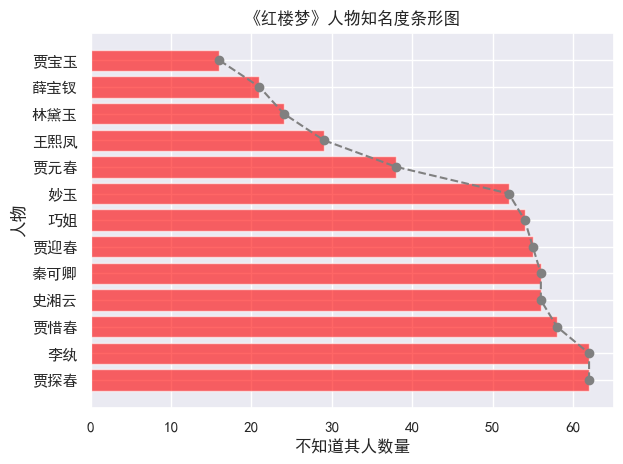

In [54]:
# 创建瀑布图
plt.barh(missing_values_df['人物'], missing_values_df['不知道数量'], color='red', alpha=0.6)
plt.xlabel('不知道其人数量')
plt.ylabel('人物')
plt.title('《红楼梦》人物知名度条形图')

# 添加瀑布效果的虚线
plt.plot(missing_values_df['不知道数量'], missing_values_df['人物'], marker='o', linestyle='--', color='gray')

# 显示图形
plt.tight_layout()  # 调整布局，防止标签重叠
plt.show()

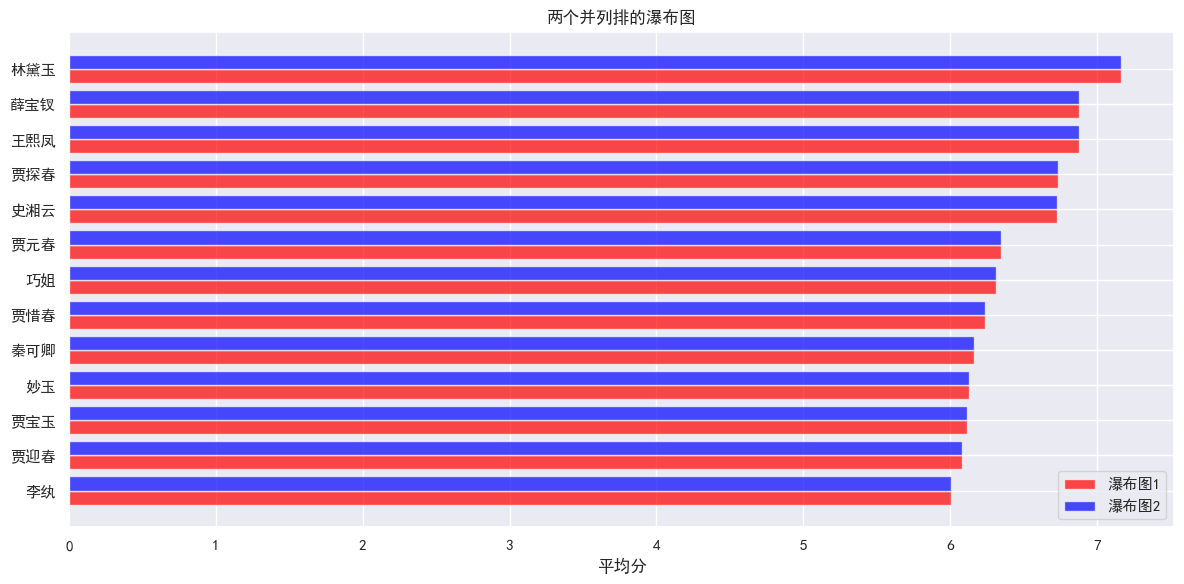

In [117]:
# 排序，确保按照分数的顺序排列
df1 = average_df_reset.sort_values(by='mean_fav_score', ascending=True)
df2 = average_df_reset.sort_values(by='mean_fav_score', ascending=True)

# 设置图形宽度
fig_width = 12  # 根据需要调整宽度
fig_height = 6  # 根据需要调整高度

# 创建图形
plt.figure(figsize=(fig_width, fig_height))

# 设置条形宽度
bar_width = 0.4  # 根据需要调整宽度

# 创建第一个瀑布图
plt.barh(np.arange(len(df1)), df1['mean_fav_score'], color='red', alpha=0.7, height=bar_width, label='瀑布图1')

# 创建第二个瀑布图
plt.barh(np.arange(len(df2)) + bar_width, df2['mean_fav_score'], color='black', alpha=0.7, height=bar_width, label='瀑布图2')

# 设置 y 轴刻度标签
plt.yticks(np.arange(len(df1)) + bar_width / 2, df1['人物'])

# 设置 x 轴标签
plt.xlabel('平均分')
plt.title('两个并列排的瀑布图')

# 添加图例
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()


## 🎉推断性统计

### 1、独立样本t检验

- **多个独立样本t检验**

In [19]:
id_vars

['full_text_reader', 'stone_fan']

In [131]:
# 指定要比较的组合
comparisons = [('男', '女'), ('城镇户口', '非城镇户口'), ('全本读者', '非全本读者'),('红迷', '非红迷')]
columns_cmp = ['gender', 'hukou','full_text_reader', 'stone_fan']
columns_dep = num_vars

# 初始化一个空的 DataFrame 用于存储结果
result_df = pd.DataFrame(columns=['Comparison', 'mean_value_1', 'mean_value_2', 'mean_diff','T-statistic', 'P-value'])

# 遍历每个组合并进行独立样本 t 检验
for comparison in comparisons:
    for column in columns_cmp:
        for column_dep in columns_dep:
            values_1 = df[column_dep][(df[column] == comparison[0])].dropna()
            values_2 = df[column_dep][(df[column] == comparison[1])].dropna()

            if not values_1.empty and not values_2.empty:
                # 计算均值
                mean_value_1 = values_1.mean()
                mean_value_2 = values_2.mean()
                # 计算均值差    
                mean_diff = mean_value_1 - mean_value_2

                # 进行独立样本 t 检验
                t_statistic, p_value = stats.ttest_ind(values_1, values_2)

                # 将结果添加到结果 DataFrame，并使用 round() 限制小数点后两位
                result_df = pd.concat([result_df, pd.DataFrame({
                    'Comparison': [f"{comparison[0]} vs {comparison[1]} ({column})-{column_dep}"],
                    'mean_value_1': [mean_value_1],
                    'mean_value_2': [mean_value_2],
                    'mean_diff': [mean_diff],
                    'T-statistic': [t_statistic],
                    'P-value': [p_value]
                }).round(2)], ignore_index=True)

# 显示结果 DataFrame
print(result_df)
# result_df.to_excel('t_test_result.xlsx')

                              Comparison  mean_value_1  mean_value_2  \
0                    男 vs 女 (gender)-贾宝玉          5.61          6.34   
1                    男 vs 女 (gender)-林黛玉          5.95          7.72   
2                    男 vs 女 (gender)-薛宝钗          5.75          7.37   
3                    男 vs 女 (gender)-贾元春          5.73          6.60   
4                    男 vs 女 (gender)-贾探春          5.75          7.17   
..                                   ...           ...           ...   
87        红迷 vs 非红迷 (stone_fan)-Openness          3.34          3.19   
88       红迷 vs 非红迷 (stone_fan)-read_freq          2.89          2.23   
89        红迷 vs 非红迷 (stone_fan)-attitude          4.37          2.68   
90  红迷 vs 非红迷 (stone_fan)-attention_freq          2.46          1.98   
91           红迷 vs 非红迷 (stone_fan)-score          3.42          1.29   

    mean_diff  T-statistic  P-value  
0       -0.73        -2.96     0.00  
1       -1.77        -6.74     0.00  
2       -1.62        

### 2、单因素方差分析

- **多类别变量的两两比较（仅供参考）**

In [44]:
import pandas as pd
from scipy import stats

# 指定要比较的组合
comparisons_education = [('高中及以下', '大学'), ('高中及以下', '研究生及以上'), ('大学', '研究生及以上')]
comparisons_major = [('中国语言文学类', '其它人文社科类（非中国语言文学类）'), ('中国语言文学类', '理工医农类'), ('其它人文社科类（非中国语言文学类）', '理工医农类')]
comparisons_age = [('18岁及以下', '19-25岁'), ('18岁及以下', '26-34岁'), ('18岁及以下', '35岁及以上'), ('19-25岁', '26-34岁'), ('19-25岁', '35岁及以上'), ('26-34岁', '35岁及以上')]
columns_cmp = ['education', 'major', 'age']
columns_dep = num_vars  # 多个依赖变量

# 初始化结果 DataFrame
result_df = pd.DataFrame()

# 循环比较 - education
for column_dep in columns_dep:
    for comparison in comparisons_education:
        values_i = df[column_dep][(df[columns_cmp[0]] == comparison[0])].dropna()
        values_j = df[column_dep][(df[columns_cmp[0]] == comparison[1])].dropna()

        if len(values_i) > 0 and len(values_j) > 0:
            t_statistic, p_value = stats.ttest_ind(values_i, values_j)
            temp_df = pd.DataFrame({
                'Comparison': [f"{comparison[0]} vs {comparison[1]} ({column_dep})"],
                'mean_value_1': [values_i.mean()],
                'mean_value_2': [values_j.mean()],
                'mean_diff': [values_i.mean() - values_j.mean()],
                'T-statistic': [t_statistic],
                'P-value': [p_value]
            }).round(2)
            result_df = pd.concat([result_df, temp_df], ignore_index=True)
        else:
            print(f"{comparison[0]} vs {comparison[1]}-{column_dep} 的样本量为 0或 1，跳过此比较")

# 循环比较 - major
for column_dep in columns_dep:
    for comparison in comparisons_major:
        values_i = df[column_dep][(df[columns_cmp[1]] == comparison[0])].dropna()
        values_j = df[column_dep][(df[columns_cmp[1]] == comparison[1])].dropna()

        if len(values_i) > 0 and len(values_j) > 0:
            t_statistic, p_value = stats.ttest_ind(values_i, values_j)
            temp_df = pd.DataFrame({
                'Comparison': [f"{comparison[0]} vs {comparison[1]} ({column_dep})"],
                'mean_value_1': [values_i.mean()],
                'mean_value_2': [values_j.mean()],
                'mean_diff': [values_i.mean() - values_j.mean()],
                'T-statistic': [t_statistic],
                'P-value': [p_value]
            }).round(2)
            result_df = pd.concat([result_df, temp_df], ignore_index=True)
        else:
            print(f"{comparison[0]} vs {comparison[1]}-{column_dep} 的样本量为 0或 1，跳过此比较")

# 循环比较 - age
for column_dep in columns_dep:
    for comparison in comparisons_age:
        values_i = df[column_dep][(df[columns_cmp[2]] == comparison[0])].dropna()
        values_j = df[column_dep][(df[columns_cmp[2]] == comparison[1])].dropna()

        if len(values_i) > 0 and len(values_j) > 0:
            t_statistic, p_value = stats.ttest_ind(values_i, values_j)
            temp_df = pd.DataFrame({
                'Comparison': [f"{comparison[0]} vs {comparison[1]} ({column_dep})"],
                'mean_value_1': [values_i.mean()],
                'mean_value_2': [values_j.mean()],
                'mean_diff': [values_i.mean() - values_j.mean()],
                'T-statistic': [t_statistic],
                'P-value': [p_value]
            }).round(2)
            result_df = pd.concat([result_df, temp_df], ignore_index=True)
        else:
            print(f"{comparison[0]} vs {comparison[1]}-{column_dep} 的样本量为 0或 1，跳过此比较")

# 显示结果 DataFrame
print(result_df.to_string())
result_df.to_excel('./结果/multigroup_t_test_result.xlsx')


                                           Comparison  mean_value_1  mean_value_2  mean_diff  T-statistic  P-value
0                                   高中及以下 vs 大学 (贾宝玉)          5.13          6.19      -1.05        -2.68     0.01
1                               高中及以下 vs 研究生及以上 (贾宝玉)          5.13          6.38      -1.25        -2.58     0.01
2                                  大学 vs 研究生及以上 (贾宝玉)          6.19          6.38      -0.19        -0.65     0.52
3                                   高中及以下 vs 大学 (林黛玉)          5.36          7.22      -1.86        -4.34     0.00
4                               高中及以下 vs 研究生及以上 (林黛玉)          5.36          7.99      -2.63        -5.44     0.00
5                                  大学 vs 研究生及以上 (林黛玉)          7.22          7.99      -0.77        -2.38     0.02
6                                   高中及以下 vs 大学 (薛宝钗)          5.18          6.90      -1.71        -4.40     0.00
7                               高中及以下 vs 研究生及以上 (薛宝钗)          5.18          7.7

- **循环的方法做ANOVA**

In [67]:
import pandas as pd
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 初始化结果 DataFrame
result_df_anova = pd.DataFrame(columns=['Variable', 'F-statistic', 'P-value'])
result_df_posthoc = pd.DataFrame(columns=['Variable_1', 'Variable_2', 'Difference', 'P-value'])
# ...

# 循环进行单因素方差分析
for cat_var in cat_multi_vars:
    for num_var in num_vars:
        # Remove rows with missing values
        df_no_missing = df[[cat_var, num_var]].dropna()

        if not df_no_missing.empty:
            # 单因素方差分析
            aov = pg.anova(data=df_no_missing, dv=num_var, between=cat_var, detailed=True)
            result_df_anova = pd.concat([result_df_anova, pd.DataFrame({
                'Variable': [f"类别：{cat_var}；因变量：{num_var}"],
                'F-statistic': [aov['F'][0]],
                'P-value': [aov['p-unc'][0]]
            })], ignore_index=True)

            # 事后检验
            try:
                posthoc = pairwise_tukeyhsd(df_no_missing[num_var], df_no_missing[cat_var])
                posthoc_df = pd.DataFrame(data=posthoc.summary().data, columns=posthoc.summary().data[0])
                posthoc_df['Variable_1'] = cat_var
                posthoc_df['Variable_2'] = num_var
                result_df_posthoc = pd.concat([result_df_posthoc, posthoc_df], ignore_index=True)
            except TypeError as e:
                print(f"Error in posthoc for {num_var} vs {cat_var}: {e}")
        else:
            print(f"Missing values in {cat_var} or {num_var}, skipping analysis.")

# 显示单因素方差分析结果
print("ANOVA Results:")
result_df_anova = result_df_anova.round(2)  # Round to two decimal places
print(result_df_anova)
# result_df_anova.to_excel('./结果/anova.xlsx')

print('\n' + '-'*100 + '\n')

# 显示事后检验结果
print("\nPosthoc Results:")
result_df_posthoc = result_df_posthoc.round(2)  # Round to two decimal places
print(result_df_posthoc)
# result_df_posthoc.to_excel('./结果/anova_posthoc.xlsx')

ANOVA Results:
                     Variable  F-statistic  P-value
0        类别：education；因变量：贾宝玉         4.24     0.01
1        类别：education；因变量：林黛玉        14.56     0.00
2        类别：education；因变量：薛宝钗        16.25     0.00
3        类别：education；因变量：贾元春         6.70     0.00
4        类别：education；因变量：贾探春        16.93     0.00
..                        ...          ...      ...
64        类别：age；因变量：Openness         2.26     0.08
65       类别：age；因变量：read_freq         6.71     0.00
66        类别：age；因变量：attitude         4.46     0.00
67  类别：age；因变量：attention_freq         4.78     0.00
68           类别：age；因变量：score         5.02     0.00

[69 rows x 3 columns]

----------------------------------------------------------------------------------------------------


Posthoc Results:
    Variable_1 Variable_2 Difference P-value  group1  group2  meandiff  \
0    education        贾宝玉        NaN     NaN  group1  group2  meandiff   
1    education        贾宝玉        NaN     NaN      大学  研究生及以上     0.19

### 3、卡方检验

In [126]:
# 列联表
crosstab = pd.crosstab(df.gender,df.full_text_reader)
crosstab

full_text_reader  全本读者  非全本读者
gender                       
女                  164    155
男                   69     84

In [127]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 

In [128]:
#卡方值
stat

1.405628662080263

In [129]:
# p值
print("p = " + str(p))

p = 0.23578341782490797


Text(0, 0.5, '总计')

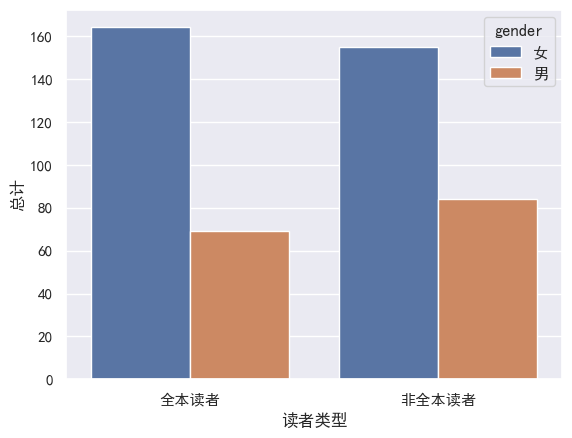

In [130]:
# 卡方检验结果可视化
sns.countplot(x = 'full_text_reader', hue = 'gender', data = df) 
plt.xlabel("读者类型")
plt.ylabel("总计")

In [131]:
crosstab = pd.crosstab(df.gender,df.stone_fan)
crosstab

stone_fan   红迷  非红迷
gender             
女          214  105
男           62   91

In [132]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 

In [133]:
p

7.384640887336378e-08

- **循环做列联表分析、卡方检验**

In [52]:
# 假设你的数据框叫做 df，其中包含多个类别变量
# cat_vars

# Initialize an empty list to store DataFrames
result_dfs = []

# Loop through two different variables
for i in range(len(cat_vars) - 1):
    for j in range(i + 1, len(cat_vars)):
        var_1 = cat_vars[i]
        var_2 = cat_vars[j]

        # Create a crosstab
        crosstab = pd.crosstab(df[var_1], df[var_2])
        
        print(f'变量： {cat_vars[i]} 和 {cat_vars[j]} \n')
        print(crosstab)
        print('\n' + '-'*30 + '\n')

        # Perform the chi-squared test
        stat, p, dof, expected = chi2_contingency(crosstab)

        # Create a DataFrame for the result
        result_df = pd.DataFrame({
            'Variable_1': [var_1],
            'Variable_2': [var_2],
            'Chi2_statistic': [stat],
            'P-value': [p]
        })

        # Append the result DataFrame to the list
        result_dfs.append(result_df)

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(result_dfs, ignore_index=True)

# Display the result DataFrame
# print(result_df)

# Save the result DataFrame to an Excel file
# result_df.to_excel('./结果/chi2_test_result.xlsx', index=False)


变量： gender 和 age 

age     18岁及以下  19-25岁  26-34岁  35岁及以上
gender                                
女           12     221      54      32
男           22      88      28      15

------------------------------

变量： gender 和 hukou 

hukou   城镇户口  非城镇户口
gender             
女        191    128
男         86     67

------------------------------

变量： gender 和 education 

education  高中及以下   大学  研究生及以上
gender                       
女             16  236      67
男             31  106      16

------------------------------

变量： gender 和 major 

major   中国语言文学类  其它人文社科类（非中国语言文学类）  理工医农类
gender                                   
女            44                161     98
男            32                 46     44

------------------------------

变量： gender 和 full_text_reader 

full_text_reader  全本读者  非全本读者
gender                       
女                  164    155
男                   69     84

------------------------------

变量： gender 和 stone_fan 

stone_fan   红迷  非红迷
gender             
女       

- **循环的方法生成簇状条形图**

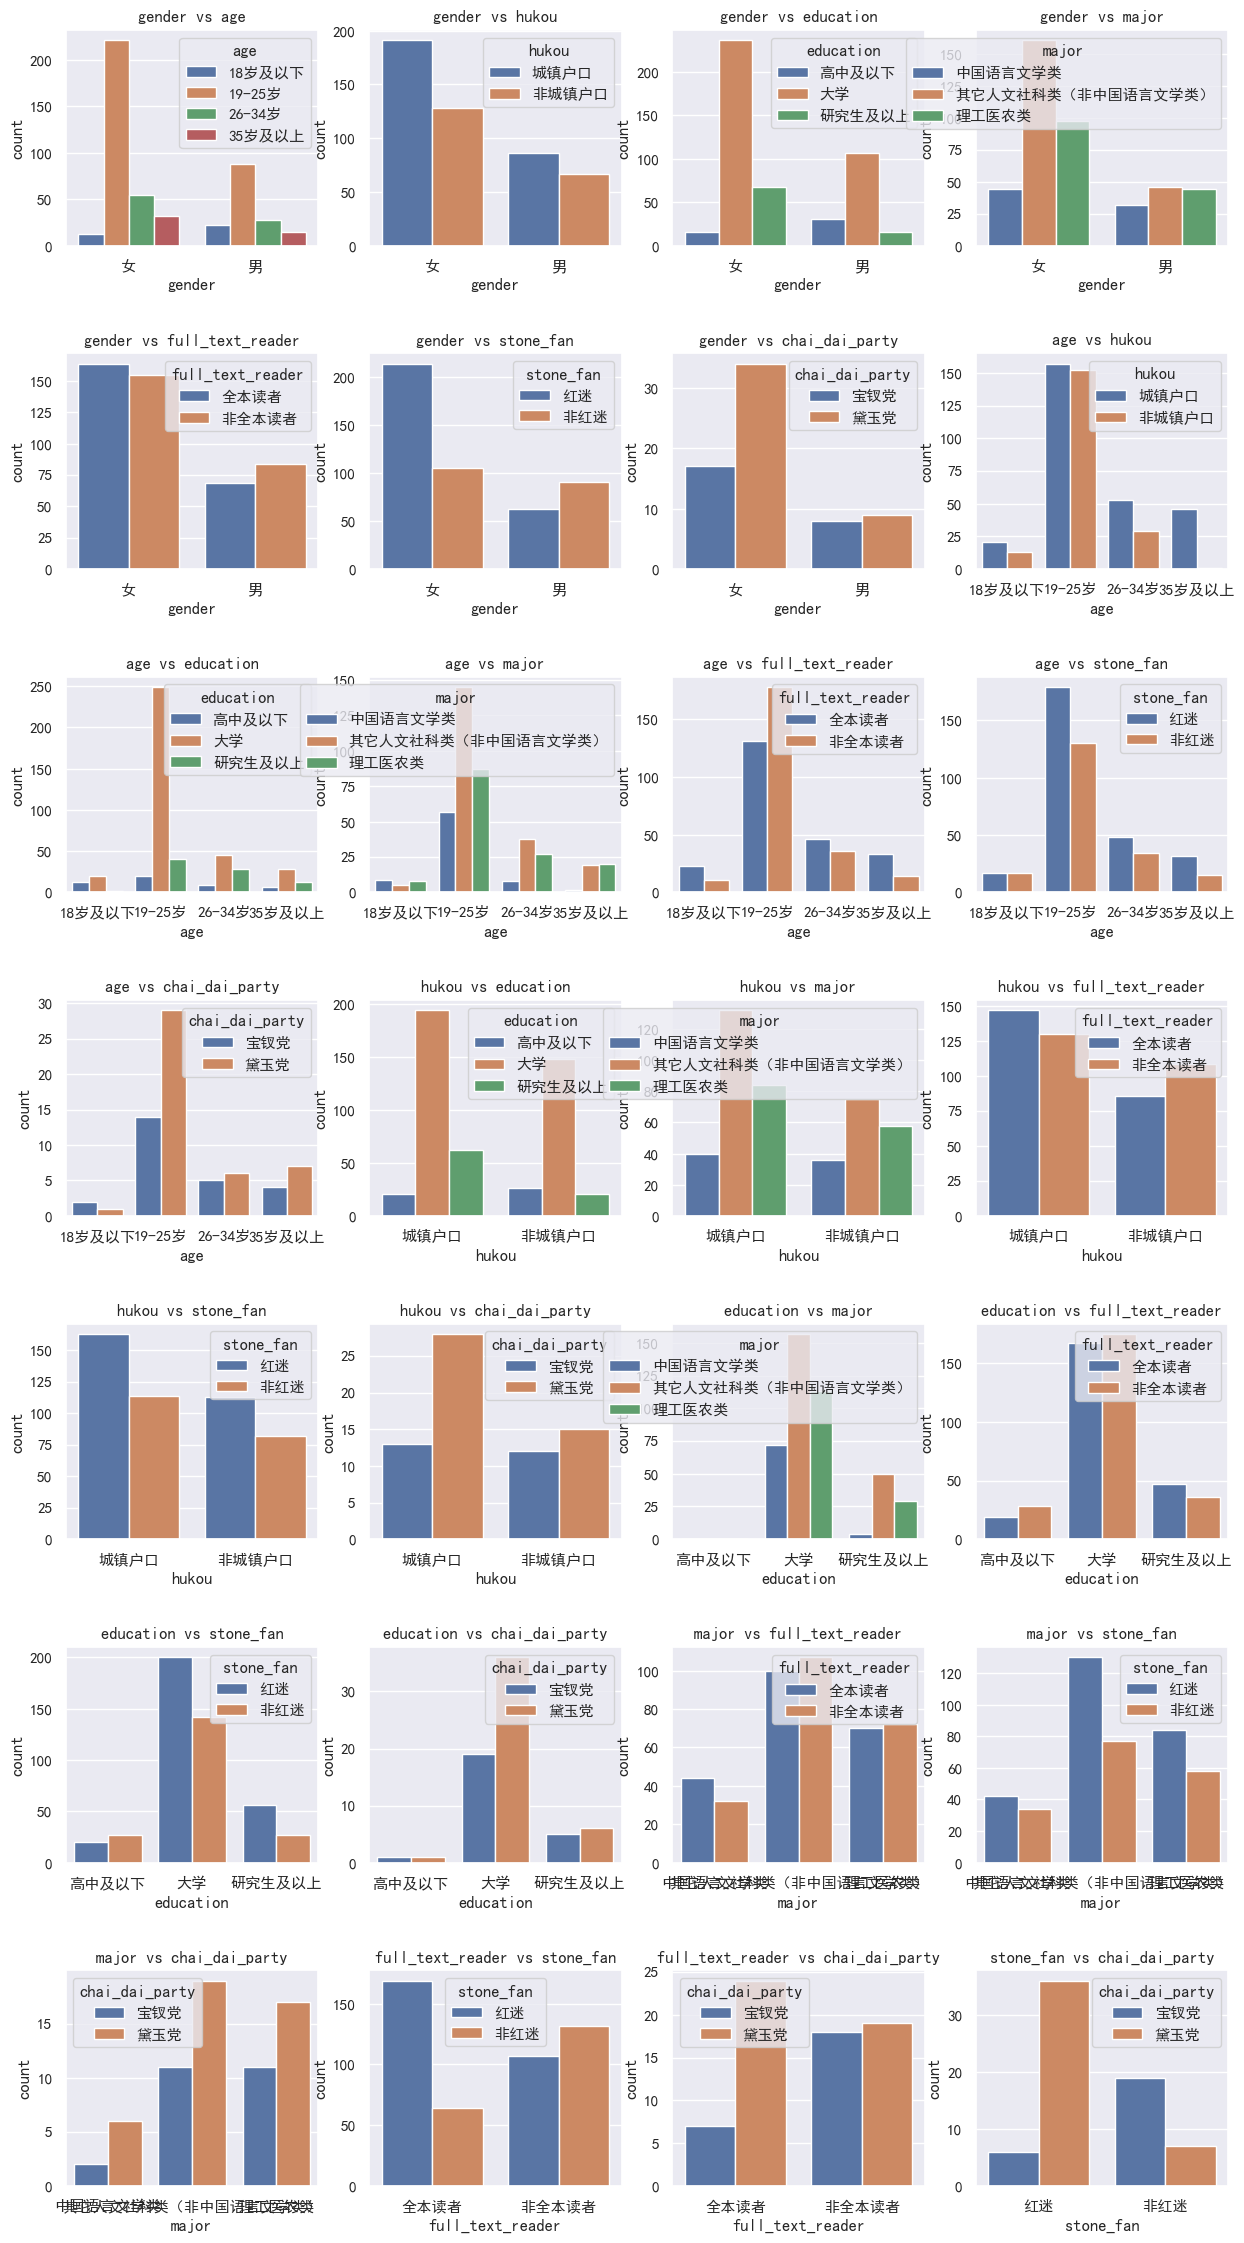

In [174]:
from itertools import combinations

# Generate all possible combinations of categorical variables
pairs = list(combinations(cat_vars, 2))

# Calculate the number of subplots per row
plots_per_row = 4

# Calculate the number of rows needed based on the total number of pairs
num_rows = (len(pairs) - 1) // plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through all unique pairs of demographic variables
for i, (var1, var2) in enumerate(pairs):
    # Calculate the subplot index
    subplot_index = i

    # Check if the subplot index is within the range of available subplots
    if subplot_index < len(axes):
        ax = axes[subplot_index]
        
        # Create a cluster bar plot for the current pair of categorical variables
        sns.countplot(x=var1, hue=var2, data=df, ax=ax)
        
        # Set the title
        ax.set_title(f'{var1} vs {var2}')

# Display the plots

### 4、相关分析

- **所有数值变量相关分析**

In [56]:
rcorr_df = df[num_vars2+stone_vars].rcorr()
rcorr_df
# rcorr_df.to_excel('./结果/corr/rcorr_test_result.xlsx')

贾宝玉     林黛玉     薛宝钗     贾元春     贾探春     史湘云      妙玉  \
贾宝玉                     -     ***     ***     ***     ***     ***     ***   
林黛玉                 0.624       -     ***     ***     ***     ***     ***   
薛宝钗                 0.601   0.681       -     ***     ***     ***     ***   
贾元春                 0.615   0.603   0.627       -     ***     ***     ***   
贾探春                 0.598   0.736   0.699   0.667       -     ***     ***   
史湘云                 0.565   0.697   0.684   0.631    0.81       -     ***   
妙玉                  0.568   0.608   0.659   0.666   0.671   0.676       -   
贾迎春                 0.549   0.547    0.61   0.653   0.618   0.633   0.734   
贾惜春                 0.568   0.635   0.632   0.664   0.701   0.659   0.726   
王熙凤                  0.51   0.645   0.665   0.592   0.703   0.706   0.621   
巧姐                  0.535   0.608   0.573   0.657   0.668   0.637   0.665   
李纨                  0.554   0.538    0.56   0.675   0.617   0.598   0.652   
秦可卿                 0.531   0.549   0.596   0.702   0.658   0.635   0.666   
gender_prejudice   -0.311  -0.402  -0.357  -0.337  -0.435  -0.474  -0.381   
Agreeableness       0.176   0.327   0.329    0.25   0.329   0.343   0.312   
Neuroticism         -0.09   -0.01  -0.084  -0.085   0.026   -0.03   -0.09   
Extraversion        0.038  -0.132  -0.039   0.021  -0.127  -0.152  -0.055   
Conscientiousness   0.086   0.095    0.09   0.007    0.01   0.037   0.093   
Openness            0.175   0.233   0.188   0.158   0.225   0.219   0.199   
read_freq          -0.022    0.15   0.037   0.003   0.156   0.108  -0.033   
attitude            0.144   0.336   0.206   0.167   0.294   0.266     0.1   
attention_freq      0.068   0.227   0.118   0.121   0.233   0.145   0.081   
score               0.243   0.497   0.365   0.313   0.476   0.441   0.272   
education_num       0.112   0.232   0.248   0.156   0.265    0.31   0.178   
age_num             0.153   0.151   0.187   0.114   0.208   0.268   0.104   
read_freq          -0.022    0.15   0.037   0.003   0.156   0.108  -0.033   
attitude            0.144   0.336   0.206   0.167   0.294   0.266     0.1   
attention_freq      0.068   0.227   0.118   0.121   0.233   0.145   0.081   
score               0.243   0.497   0.365   0.313   0.476   0.441   0.272   

                      贾迎春     贾惜春     王熙凤  ... read_freq attitude  \
贾宝玉                   ***     ***     ***  ...                 **   
林黛玉                   ***     ***     ***  ...        **      ***   
薛宝钗                   ***     ***     ***  ...                ***   
贾元春                   ***     ***     ***  ...                ***   
贾探春                   ***     ***     ***  ...        **      ***   
史湘云                   ***     ***     ***  ...         *      ***   
妙玉                    ***     ***     ***  ...                  *   
贾迎春                     -     ***     ***  ...                      
贾惜春                 0.747       -     ***  ...                  *   
王熙凤                 0.567   0.629       -  ...                ***   
巧姐                  0.684   0.737   0.634  ...                  *   
李纨                  0.654   0.696   0.573  ...                  *   
秦可卿                 0.679   0.694    0.59  ...                  *   
gender_prejudice   -0.274  -0.292  -0.407  ...                  *   
Agreeableness       0.265   0.281   0.317  ...                ***   
Neuroticism         -0.07  -0.049  -0.023  ...                      
Extraversion       -0.017  -0.001  -0.076  ...                ***   
Conscientiousness   0.037   0.021   0.019  ...                      
Openness            0.137   0.196   0.191  ...         *        *   
read_freq          -0.058  -0.031    0.03  ...         -      ***   
attitude            0.064   0.117    0.23  ...     0.368        -   
attention_freq      0.066    0.06   0.169  ...     0.438    0.342   
score               0.206   0.259   0.397  ...     0.402    0.445   
education_num       0.173   0.157   0.195  ...     0.12

In [64]:
rcorr_df.transpose()#.to_excel('./结果/corr/rcorr_test_result2.xlsx')

- **人物喜爱度 + 大五人格&善意性别偏见**

In [178]:
rcorr_df.loc[chars_vars,pp_vars]
# .to_excel('./结果/rcorr_chars_pp.xlsx')

In [179]:
rcorr_df.loc[pp_vars,chars_vars].transpose()
# .to_excel('./结果/rcorr_chars_pp2.xlsx')

In [121]:
type(rcorr_df)

pandas.core.frame.DataFrame

- **散点图可视化**

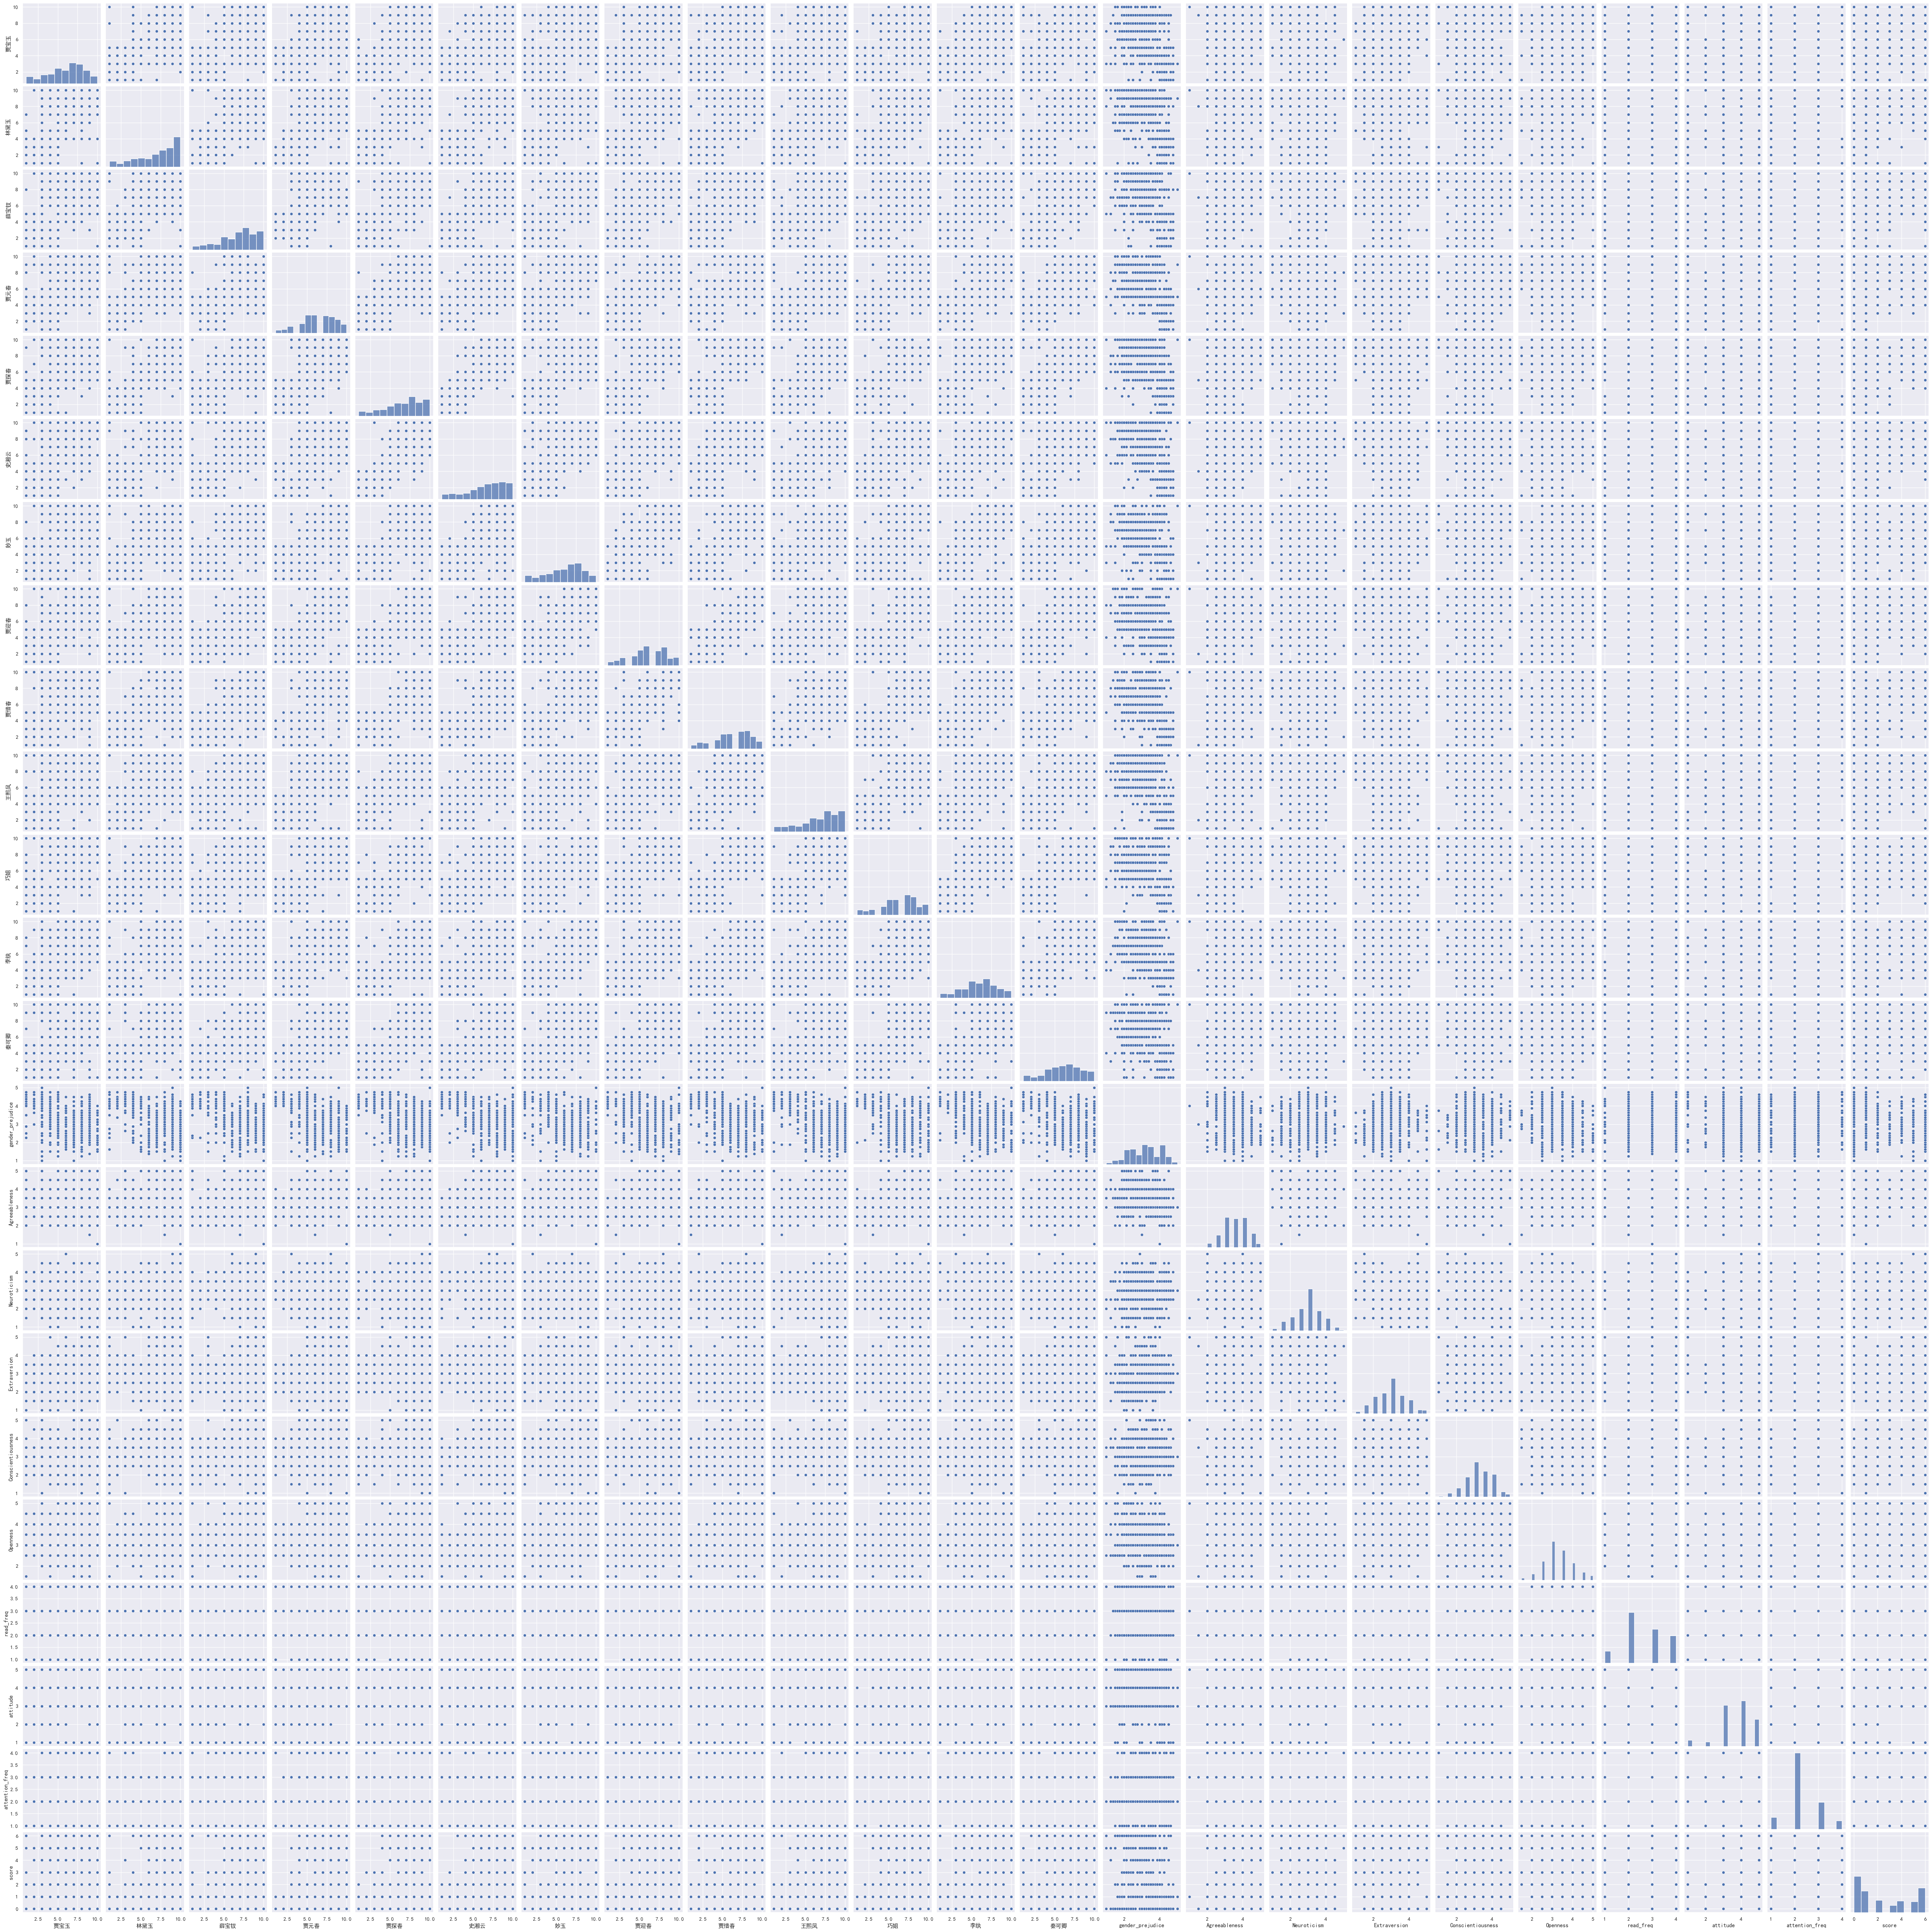

In [176]:
# Create scatter plots for all pairs of numeric variables
sns.pairplot(df[num_vars2])
plt.show()

- **马赛克图**

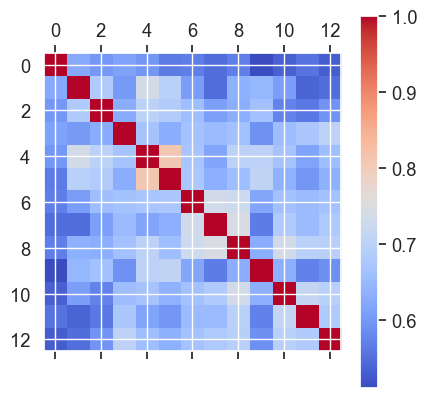

In [174]:
# 画相关系数表
plt.matshow(df[chars_vars].corr(), cmap='coolwarm')

# 添加颜色条
plt.colorbar()

- **排除人物喜爱度的数值型变量相关系数表**

In [142]:
non_char_vars_corrtable = df[pp_vars+stone_vars].rcorr()
non_char_vars_corrtable
# non_char_vars_corrtable.to_excel('./结果/non_char_vars_corrtable.xlsx')

gender_prejudice Agreeableness Neuroticism Extraversion  \
gender_prejudice                 -           ***                       **   
Agreeableness               -0.235             -         ***          ***   
Neuroticism                  0.057        -0.158           -            *   
Extraversion                 0.138        -0.178      -0.108            -   
Conscientiousness           -0.008         0.274      -0.326       -0.001   
Openness                     -0.15         0.199      -0.129        0.188   
read_freq                   -0.066         0.017       0.029       -0.073   
attitude                    -0.111          0.26        0.05       -0.153   
attention_freq              -0.015         0.091       0.096        -0.08   
score                       -0.288         0.363        0.07       -0.135   

                  Conscientiousness Openness read_freq attitude  \
gender_prejudice                          **                  *   
Agreeableness                   ***      ***                ***   
Neuroticism                     ***       **                      
Extraversion                             ***                ***   
Conscientiousness                 -       **                      
Openness                       0.12        -         *        *   
read_freq                    -0.037    0.108         -      ***   
attitude                      0.048    0.114     0.368        -   
attention_freq               -0.011    0.103     0.438    0.342   
score                         0.022    0.163     0.402    0.445   

                  attention_freq score  
gender_prejudice                   ***  
Agreeableness                  *   ***  
Neuroticism                    *        
Extraversion                        **  
Conscientiousness                       
Openness                       *   ***  
read_freq                    ***   ***  
attitude                     ***   ***  
attention_freq                 -   ***  
score                      0.395     -

In [143]:
non_char_vars_corrtable.transpose()

gender_prejudice Agreeableness Neuroticism Extraversion  \
gender_prejudice                 -        -0.235       0.057        0.138   
Agreeableness                  ***             -      -0.158       -0.178   
Neuroticism                                  ***           -       -0.108   
Extraversion                    **           ***           *            -   
Conscientiousness                            ***         ***                
Openness                        **           ***          **          ***   
read_freq                                                                   
attitude                         *           ***                      ***   
attention_freq                                 *           *                
score                          ***           ***                       **   

                  Conscientiousness Openness read_freq attitude  \
gender_prejudice             -0.008    -0.15    -0.066   -0.111   
Agreeableness                 0.274    0.199     0.017     0.26   
Neuroticism                  -0.326   -0.129     0.029     0.05   
Extraversion                 -0.001    0.188    -0.073   -0.153   
Conscientiousness                 -     0.12    -0.037    0.048   
Openness                         **        -     0.108    0.114   
read_freq                                  *         -    0.368   
attitude                                   *       ***        -   
attention_freq                             *       ***      ***   
score                                    ***       ***      ***   

                  attention_freq   score  
gender_prejudice          -0.015  -0.288  
Agreeableness              0.091   0.363  
Neuroticism                0.096    0.07  
Extraversion               -0.08  -0.135  
Conscientiousness         -0.011   0.022  
Openness                   0.103   0.163  
read_freq                  0.438   0.402  
attitude                   0.342   0.445  
attention_freq                 -   0.395  
score                        ***       -

- **小说人物喜爱度相关系数表**

In [50]:
char_vars_corrtable = df[chars_vars].rcorr()
char_vars_corrtable
# char_vars_corrtable.to_excel('./结果/char_vars_corrtable.xlsx')

贾宝玉    林黛玉    薛宝钗    贾元春    贾探春    史湘云     妙玉    贾迎春    贾惜春    王熙凤  \
贾宝玉      -    ***    ***    ***    ***    ***    ***    ***    ***    ***   
林黛玉  0.624      -    ***    ***    ***    ***    ***    ***    ***    ***   
薛宝钗  0.601  0.681      -    ***    ***    ***    ***    ***    ***    ***   
贾元春  0.615  0.603  0.627      -    ***    ***    ***    ***    ***    ***   
贾探春  0.598  0.736  0.699  0.667      -    ***    ***    ***    ***    ***   
史湘云  0.565  0.697  0.684  0.631   0.81      -    ***    ***    ***    ***   
妙玉   0.568  0.608  0.659  0.666  0.671  0.676      -    ***    ***    ***   
贾迎春  0.549  0.547   0.61  0.653  0.618  0.633  0.734      -    ***    ***   
贾惜春  0.568  0.635  0.632  0.664  0.701  0.659  0.726  0.747      -    ***   
王熙凤   0.51  0.645  0.665  0.592  0.703  0.706  0.621  0.567  0.629      -   
巧姐   0.535  0.608  0.573  0.657  0.668  0.637  0.665  0.684  0.737  0.634   
李纨   0.554  0.538   0.56  0.675  0.617  0.598  0.652  0.654  0.696  0.573   
秦可卿  0.531  0.549  0.596  0.702  0.658  0.635  0.666  0.679  0.694   0.59   

        巧姐     李纨  秦可卿  
贾宝玉    ***    ***  ***  
林黛玉    ***    ***  ***  
薛宝钗    ***    ***  ***  
贾元春    ***    ***  ***  
贾探春    ***    ***  ***  
史湘云    ***    ***  ***  
妙玉     ***    ***  ***  
贾迎春    ***    ***  ***  
贾惜春    ***    ***  ***  
王熙凤    ***    ***  ***  
巧姐       -    ***  ***  
李纨   0.711      -  ***  
秦可卿  0.696  0.681    -

In [30]:
corr_table2 = df_reader[chars_vars+stone_vars+pp_vars].rcorr()
corr_table2

贾宝玉     林黛玉     薛宝钗     贾元春     贾探春     史湘云      妙玉  \
贾宝玉                     -     ***     ***     ***     ***     ***     ***   
林黛玉                 0.639       -     ***     ***     ***     ***     ***   
薛宝钗                 0.594   0.707       -     ***     ***     ***     ***   
贾元春                 0.663   0.645   0.657       -     ***     ***     ***   
贾探春                 0.641   0.799   0.727   0.716       -     ***     ***   
史湘云                 0.596   0.756   0.731   0.653   0.827       -     ***   
妙玉                  0.581   0.623   0.657   0.702   0.648   0.641       -   
贾迎春                  0.63   0.577   0.654   0.691   0.603   0.617   0.769   
贾惜春                 0.622    0.65   0.667   0.737   0.686   0.632   0.756   
王熙凤                 0.551   0.712    0.71   0.635   0.764   0.739   0.657   
巧姐                  0.568   0.615   0.572   0.685   0.678   0.636   0.653   
李纨                  0.585   0.553   0.599   0.701    0.64    0.63   0.635   
秦可卿                 0.547   0.556   0.624     0.7   0.652   0.626    0.68   
read_freq           0.121   0.192   0.075   0.029   0.256   0.264   0.056   
attitude            0.242   0.421   0.267   0.233    0.38   0.325   0.166   
attention_freq      0.188   0.298   0.202   0.176   0.289   0.207   0.193   
score               0.322   0.615   0.496     0.4   0.604   0.554   0.367   
gender_prejudice   -0.306   -0.43  -0.451  -0.413  -0.498  -0.564  -0.422   
Agreeableness       0.205   0.445   0.391   0.244     0.4    0.38   0.344   
Neuroticism        -0.072   0.003   -0.08  -0.137   0.053  -0.014   -0.05   
Extraversion        0.061  -0.155  -0.076  -0.006  -0.154  -0.161  -0.098   
Conscientiousness   0.094   0.145   0.091   0.053  -0.008   0.008   0.081   
Openness            0.237   0.241   0.186   0.179   0.217   0.228   0.215   

                      贾迎春     贾惜春     王熙凤  ... read_freq attitude  \
贾宝玉                   ***     ***     ***  ...                ***   
林黛玉                   ***     ***     ***  ...        **      ***   
薛宝钗                   ***     ***     ***  ...                ***   
贾元春                   ***     ***     ***  ...                ***   
贾探春                   ***     ***     ***  ...       ***      ***   
史湘云                   ***     ***     ***  ...       ***      ***   
妙玉                    ***     ***     ***  ...                  *   
贾迎春                     -     ***     ***  ...                      
贾惜春                 0.771       -     ***  ...                 **   
王熙凤                 0.617   0.647       -  ...                ***   
巧姐                  0.702   0.728   0.655  ...                 **   
李纨                  0.709   0.708    0.62  ...                 **   
秦可卿                 0.705   0.696   0.635  ...                 **   
read_freq          -0.003    0.02   0.101  ...         -      ***   
attitude            0.108     0.2   0.295  ...     0.311        -   
attention_freq      0.124   0.133   0.274  ...      0.36    0.354   
score               0.291   0.361   0.517  ...     0.387    0.476   
gender_prejudice    -0.34   -0.35  -0.471  ...    -0.134   -0.133   
Agreeableness       0.273   0.303   0.397  ...     0.025    0.289   
Neuroticism        -0.113  -0.051    0.01  ...     0.059    0.022   
Extraversion        0.014    0.01  -0.113  ...    -0.036   -0.181   
Conscientiousness   0.032    0.03   0.072  ...    -0.208   -0.006   
Openness            0.167   0.199   0.238  ...     0.116    0.148   

                  attention_freq   score gender_prejudice Agreeableness  \
贾宝玉                           **     ***              ***            **   
林黛玉                          ***     ***              ***           ***   
薛宝钗                           **     ***              ***           ***   
贾元春                           **     ***              ***           ***   
贾探春                          ***     ***              ***           ***   
史湘云                           **     ***              ***         

In [175]:
corr_table2.transpose()

贾宝玉    林黛玉    薛宝钗    贾元春    贾探春    史湘云     妙玉    贾迎春  \
贾宝玉                  -  0.639  0.594  0.663  0.641  0.596  0.581   0.63   
林黛玉                ***      -  0.707  0.645  0.799  0.756  0.623  0.577   
薛宝钗                ***    ***      -  0.657  0.727  0.731  0.657  0.654   
贾元春                ***    ***    ***      -  0.716  0.653  0.702  0.691   
贾探春                ***    ***    ***    ***      -  0.827  0.648  0.603   
史湘云                ***    ***    ***    ***    ***      -  0.641  0.617   
妙玉                 ***    ***    ***    ***    ***    ***      -  0.769   
贾迎春                ***    ***    ***    ***    ***    ***    ***      -   
贾惜春                ***    ***    ***    ***    ***    ***    ***    ***   
王熙凤                ***    ***    ***    ***    ***    ***    ***    ***   
巧姐                 ***    ***    ***    ***    ***    ***    ***    ***   
李纨                 ***    ***    ***    ***    ***    ***    ***    ***   
秦可卿                ***    ***    ***    ***    ***    ***    ***    ***   
read_freq                  **                  ***    ***                 
attitude           ***    ***    ***    ***    ***    ***      *          
attention_freq      **    ***     **     **    ***     **     **          
score              ***    ***    ***    ***    ***    ***    ***    ***   
gender_prejudice   ***    ***    ***    ***    ***    ***    ***    ***   
Agreeableness       **    ***    ***    ***    ***    ***    ***    ***   
Neuroticism                               *                               
Extraversion                *                    *      *                 
Conscientiousness           *                                             
Openness           ***    ***     **     **     **    ***     **      *   

                     贾惜春    王熙凤  ... read_freq attitude attention_freq  score  \
贾宝玉                0.622  0.551  ...     0.121    0.242          0.188  0.322   
林黛玉                 0.65  0.712  ...     0.192    0.421          0.298  0.615   
薛宝钗                0.667   0.71  ...     0.075    0.267          0.202  0.496   
贾元春                0.737  0.635  ...     0.029    0.233          0.176    0.4   
贾探春                0.686  0.764  ...     0.256     0.38          0.289  0.604   
史湘云                0.632  0.739  ...     0.264    0.325          0.207  0.554   
妙玉                 0.756  0.657  ...     0.056    0.166          0.193  0.367   
贾迎春                0.771  0.617  ...    -0.003    0.108          0.124  0.291   
贾惜春                    -  0.647  ...      0.02      0.2          0.133  0.361   
王熙凤                  ***      -  ...     0.101    0.295          0.274  0.517   
巧姐                   ***    ***  ...    -0.011    0.178          0.133  0.388   
李纨                   ***    ***  ...    -0.012    0.188           0.09  0.313   
秦可卿                  ***    ***  ...     0.076    0.184          0.172  0.375   
read_freq                        ...         -    0.311           0.36  0.387   
attitude              **    ***  ...       ***        -          0.354  0.476   
attention_freq         *    ***  ...       ***      ***              -  0.373   
score                ***    ***  ...       ***      ***            ***      -   
gender_prejudice     ***    ***  ...         *        *                   ***   
Agreeableness        ***    ***  ...                ***             **    ***   
Neuroticism                      ...                                            
Extraversion                     ...                 **                     *   
Conscientiousness                ...        **                                  
Openness              **    ***  ...                  *              *    ***   

                  gender_prejudice Agreeableness Neuroticism Extraversion  \
贾宝玉                         -0.306         0.205      -0.072        0.061   
林黛玉                          -0.43         0.445       0.003       -0.155   
薛宝钗                         -0.451        

### 5、信度分析

In [175]:
df_gender_pre= df.filter(regex = "^gender_pre_.*")#以正则表达式的办法筛选以"gender_pre_"开头的变量
pg.cronbach_alpha(data=df_gender_pre)[0].round(2)

0.83

## 6.回归分析

###  **《红楼梦》态度作为因变量**

In [122]:
dependent_variable = "attitude"
independent_variables =  dem_vars + per_vars 

formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

model = smf.ols(formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     6.129
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.61e-10
Time:                        22:55:58   Log-Likelihood:                -553.70
No. Observations:                 425   AIC:                             1135.
Df Residuals:                     411   BIC:                             1192.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.5734      0.332      4.733      0.000       0.920       2.227
gender[T.男]                   -0.3257      0.104     -3.140      0.002      -0.530      -0.122
age[T.19-25岁]                  0.2837      0.208      1.364      0.173      -0.125       0.692
age[T.26-34岁]                  0.5173      0.228      2.268      0.024       0.069       0.966
age[T.35岁及以上]                  0.9080      0.247      3.682      0.000       0.423       1.393
hukou[T.非城镇户口]                 0.0018      0.096      0.019      0.985      -0.187       0.190
education[T.大学]                0.7658      0.165      4.648      0.000       0.442       1.090
education[T.研究生及以上]            0.8077      0.188      4.307      0.000       0.439       1.176
major[T.其它人文社科类（非中国语言文学类）]    -0.0141      0.127     -0.111      0.912      -0.265       0.236
major[T.理工医农类]                -0.0842      0.134     -0.630      0.529      -0.347       0.178
Agreeableness                  0.2557      0.071      3.586      0.000       0.116       0.396
Neuroticism                    0.0827      0.061      1.356      0.176      -0.037       0.202
Extraversion                  -0.1186      0.053     -2.251      0.025      -0.222      -0.015
Conscientiousness             -0.0123      0.062     -0.197      0.844      -0.135       0.110
Openness                       0.1077      0.064      1.689      0.092      -0.018       0.233
==============================================================================
Omnibus:                       21.117   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.733
Skew:                          -0.500   Prob(JB):                     7.02e-06
Kurtosis:                       3.584   Cond. No.                     1.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- **结果解读**：性别、年龄、学历、宜人性、外向性影响《红楼梦》态度【87,2010影视作品加进去也显著】

###  **阅读深度作为因变量**

**🎶probit模型**

In [36]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df[dem_vars], drop_first=True)

# Convert boolean columns to numeric (0 or 1)
df_dummies = df_dummies.astype(int)

# Concatenate dummy variables with personality variables
df_combined = pd.concat([df_dummies, df[per_vars]], axis=1)

# Fit the ordered probit model
mod_prob = OrderedModel(df['read_freq'], df_combined, distr='probit')
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())


Optimization terminated successfully.
         Current function value: 1.229264
         Iterations: 48
         Function evaluations: 50
         Gradient evaluations: 50
                             OrderedModel Results                             
Dep. Variable:              read_freq   Log-Likelihood:                -580.21
Model:                   OrderedModel   AIC:                             1194.
Method:            Maximum Likelihood   BIC:                             1265.
Date:                Sun, 28 Jan 2024                                         
Time:                        14:58:28                                         
No. Observations:                 472                                         
Df Residuals:                     455                                         
Df Model:                          17                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

**🎶OLS模型**

In [24]:
dependent_variable = "read_freq"
independent_variables =  dem_vars + per_vars # + chocie_vars2 

formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

model = smf.ols(formula, data=df).fit()

model.summary()


# 从模型结果中获取汇总信息
summary_df = pd.DataFrame({
    'coefficients': model.params,
    'standard_errors': model.bse,
    't_values': model.tvalues,
    'p_values': model.pvalues,
})

# 打印汇总信息
print(summary_df)

# 如果你想要保存为CSV文件
summary_df.to_excel('./结果/reg/read_freq.xlsx')

                            coefficients  standard_errors  t_values  \
Intercept                       2.076689         0.321925  6.450850   
gender[T.男]                    -0.333741         0.100418 -3.323502   
age[T.19-25岁]                  -0.226166         0.201355 -1.123219   
age[T.26-34岁]                   0.181708         0.220849  0.822768   
age[T.35岁及以上]                   0.479663         0.238759  2.008983   
hukou[T.非城镇户口]                 -0.033003         0.092900 -0.355253   
education[T.大学]                 0.990478         0.159543  6.208227   
education[T.研究生及以上]             1.086212         0.181567  5.982428   
major[T.其它人文社科类（非中国语言文学类）]     -0.289193         0.123347 -2.344557   
major[T.理工医农类]                 -0.199597         0.129357 -1.542997   
Agreeableness                  -0.045927         0.069049 -0.665128   
Neuroticism                     0.010290         0.059009  0.174382   
Extraversion                   -0.090733         0.051016 -1.778528   
Consci

AttributeError: 'DataFrame' object has no attribute 'to_xlsx'

- **结果解读**：性别、年龄、教育、开放性影响《红楼梦》阅读深度

###  **《红楼梦》人物喜爱度作为因变量**

In [41]:
import statsmodels.formula.api as smf

dependent_variables = chars_vars
independent_variables =  dem_vars + pp_vars + ['read_freq',"attitude"] 

df_reg_liking =df #full_sample
# df_reg_liking =df_reader #reader sample
# df_reg_liking =df_fan #fan sample


# 初始化一个空的 DataFrame 用于存储回归结果
regression_results = pd.DataFrame(columns=['Dependent Variable', "Independent Variable", 'Coefficients', 't-values','P-values', 'Standardized Coefficients','R-squared','rsquared_adj'])

# 遍历每个因变量进行回归分析
for dependent_variable in dependent_variables:
    # 构建回归模型的 formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"
   
    # 拟合回归模型
    model = smf.ols(formula, data=df_reg_liking).fit()
   
    # 提取回归结果中的相关信息
    r_squared = model.rsquared
    rsquared_adj = model.rsquared_adj
    coefficients = model.params  
    t_values = model.tvalues
    p_values = model.pvalues 
    ivs = model.model.exog_names # 自变量
    standardized_coefficients = model.params / model.params.std()# 获取标准化系数

    # 将结果添加到结果 DataFrame
    result_rows = pd.DataFrame({
        'Dependent Variable': [dependent_variable] * len(ivs),
        'Independent Variable': ivs,
        'Coefficients': coefficients.values,        
        't-values': t_values.round(2).values,
        'P-values': p_values.round(2).values,
        'Standardized Coefficients': standardized_coefficients.round(2).values,
        # 'Standardized P-values': p_values.round(2).values,
        'R-squared': [round(r_squared, 2)]* len(ivs),
        'rsquared_adj': [round(rsquared_adj, 2)]* len(ivs)
    })
    
    # 将结果添加到结果 DataFrame
    regression_results = pd.concat([regression_results, result_rows], ignore_index=True)

# 设置因变量为索引
regression_results_coff = regression_results.set_index('Dependent Variable')

# 显示回归结果 DataFrame
print(regression_results_coff)

# 保存到 Excel 文件
regression_results.to_excel("./结果/reg/liking.xlsx")
# regression_results.to_excel("./结果/reg/liking_reader.xlsx")
# regression_results.to_excel("./结果/reg/liking_fan.xlsx")

                   Independent Variable  Coefficients  t-values  P-values  \
Dependent Variable                                                          
贾宝玉                           Intercept      5.527178      4.02      0.00   
贾宝玉                         gender[T.男]     -0.254708     -1.00      0.32   
贾宝玉                      hukou[T.非城镇户口]     -0.269422     -1.17      0.24   
贾宝玉                     education[T.大学]      0.159997      0.41      0.68   
贾宝玉                 education[T.研究生及以上]      0.121386      0.26      0.80   
...                                 ...           ...       ...       ...   
秦可卿                        Extraversion      0.223636      1.63      0.10   
秦可卿                   Conscientiousness     -0.282381     -1.79      0.07   
秦可卿                            Openness      0.177293      1.10      0.27   
秦可卿                           read_freq     -0.231350     -1.71      0.09   
秦可卿                            attitude      0.111012      0.91      0.37   